# Latent Gaussian Compression (LGC): Dataset Compression and Reconstruction with Autoencoders and Gaussian Mixture Models

## Overview

This project explores a machine learning-based approach to compress and reconstruct large-scale image datasets, such as MNIST or CIFAR-10. By combining autoencoders and Gaussian Mixture Models (GMMs), we aim to create a compact, efficient representation of the dataset that maintains key features for classification.

### Project Goals

1. **Compress**: Use an autoencoder to encode images into a low-dimensional latent space.
2. **Model**: Capture the distribution of the compressed latent space using a GMM.
3. **Reconstruct**: Sample from the GMM and decode to recreate images.
4. **Evaluate**: Train a classifier on the reconstructed dataset and compare performance to the original.

### Motivation

Traditional compression methods may not preserve essential features for machine learning tasks. This approach leverages learned representations and generative models to balance storage efficiency with classification performance.

### Approach

The notebook is organized into:
1. **Autoencoder Compression**: Encode and decode images using an autoencoder.
2. **Latent Space Modeling with GMM**: Fit a GMM to latent representations.
3. **Reconstruction**: Generate synthetic images from GMM samples.
4. **Evaluation**: Compare classifier performance on reconstructed and original data.

Let’s dive in!


# Part 1: Autoencoder Compression

In this section, we will build and train an autoencoder using PyTorch to compress an image dataset (e.g., MNIST) into a lower-dimensional latent space. The encoder will project images to a lower-dimensional representation $ R^K $ where $ K \ll D $, allowing us to capture essential information with reduced storage requirements.

### Theory

An autoencoder consists of two main parts:
1. **Encoder**: Maps the input data $ X $ to a latent space $ Z $.
   $$ Z = f_{\text{encoder}}(X) $$
2. **Decoder**: Reconstructs the input data from the latent space.
   $$ X' = f_{\text{decoder}}(Z) $$

The objective is to minimize the reconstruction loss:
$$ L = \frac{1}{N} \sum_{i=1}^N (X_i - X_i')^2 $$

### Steps:
1. Define the autoencoder architecture.
2. Train the autoencoder on the image dataset.
3. Visualize a few examples of original and reconstructed images.

Let’s start by importing necessary libraries and setting up the dataset.
One link for importing one notebook into another:
- https://saturncloud.io/blog/how-to-import-jupyter-notebooks-to-another-jupyter-notebook/#:~:text=There%20are%20two%20main%20ways%20to%20import%20Jupyter,module%20and%20use%20its%20code%20in%20another%20notebook.


In [ ]:
# toggle pathing
# drive_path = '/content/drive/My Drive/Colab Notebooks/CS 260D Large Scale Machine Learning/Final Project/'
# drive_path = '/content/drive/MyDrive/UCLA Fall 2024/[Shared] CS 260D Large Scale Machine Learning/Final Project'
drive_path = '/content/drive/MyDrive/[Shared] CS 260D Large Scale Machine Learning/Final Project'
data_path = rf'{drive_path}/data'

In [ ]:
#this allows reimported py source files to be reloaded
%load_ext autoreload
%autoreload 2

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torchsummary import summary
import matplotlib.pyplot as plt
import os
import sys

# Optionally, mount Google Drive if you want to save the data to Google Drive for persistence
# Uncomment the following lines if you'd like to save to Google Drive
from google.colab import drive
# drive.mount('/content/drive')
# data_path = '/content/drive/My Drive/Colab Notebooks/data'
drive.mount('/content/drive')


sys.path.append(drive_path) # Define the path in the Shared Drive

# Otherwise, define a local path in the current Colab working directory
# data_path = './data'

# Check for GPU support
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Ensure the local 'data' directory exists
os.makedirs(data_path, exist_ok=True)

# Download the MNIST dataset to the specified data path
transform = transforms.Compose([transforms.ToTensor()])
full_dataset = datasets.MNIST(root=data_path, train=True, transform=transform, download=True)

# Split dataset into train and test portions
train_size = int(5/6 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create train and test loaders for the dataset
train_loader = DataLoader(train_dataset, batch_size=2**8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2**8, shuffle=False)

# Access targets for a Subset
train_targets = torch.tensor([full_dataset.targets[i] for i in train_dataset.indices])
test_targets = torch.tensor([full_dataset.targets[i] for i in test_dataset.indices])

Mounted at /content/drive
Using device: cpu


In [ ]:
print(f"Train loader:{train_loader.batch_size * len(train_loader)}")
print(f"Test loader:{test_loader.batch_size * len(test_loader)}")
print(f"Train targets shape: {train_targets.shape}")
print(f"Test targets shape: {test_targets.shape}")

Train loader:50176
Test loader:10240
Train targets shape: torch.Size([50000])
Test targets shape: torch.Size([10000])


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
print(os.listdir(drive_path))
print(os.listdir(os.path.join(drive_path, 'utils')))
print(os.listdir(os.path.join(drive_path, 'data')))
print(os.listdir(drive_path))

['Final Project Proposal.gdoc', 'utils', 'data', 'references', 'GMM Visualization', 'Subset Selection w Exemplar Clustering', 'Recordings', 'Final Project Colab.ipynb']
['__pycache__', 'AE.py', 'CVAE.py', 'VAE.py', 'VAE_contrastive.py', 'AE_contrastive.py', 'tools.py']
['MNIST', 'Porosity', 'height_weight', 'bimodal']
['Final Project Proposal.gdoc', 'utils', 'data', 'references', 'GMM Visualization', 'Subset Selection w Exemplar Clustering', 'Recordings', 'Final Project Colab.ipynb']


### Autoencoder Architecture

Here, we define an autoencoder with two main parts: the encoder and the decoder.
Fill in the specific layer details as per your experimentation needs.


In [ ]:
# Import pdb debugging tool
import pdb

# Import defaultdict
from collections import defaultdict

# Import models
import utils.AE as AE
from utils.AE import hello_AE
import utils.AE_contrastive as AE_contrastive
from utils.AE_contrastive import hello_AE_contrastive
import utils.VAE as VAE
from utils.VAE import hello_VAE
import utils.CVAE as CVAE
from utils.CVAE import hello_CVAE
from utils.CVAE import wrap_CVAE #need to wrap CVAE to accomodate summary call
from utils.tools import one_hot
import utils.VAE_contrastive as VAE_contrastive
from utils.VAE_contrastive import hello_VAE_contrastive
from utils.VAE import hello_VAE

# Import torch functional utilities
import torch.nn.functional as F

hello_AE()
hello_AE_contrastive()
hello_VAE()
hello_CVAE()
hello_VAE_contrastive()

Using device: cpu
Successfully imported AE
Using device: cpu
Hello from AE.py!
Hello from AE_contrastive.py!
Hello from VAE.py!
Hello from CVAE.py!
Hello from VAE_contrastive.py!


In [ ]:
# Set model architecture
W, H = 28, 28
input_size = W*H
hidden_dim = 128
latent_size = 64
num_classes = len(torch.unique(train_targets))
# AE: autoencoder
# AE_contrastive: AE with contrastive learning
# VAE: variational autoencoder
# CVAE: conditional variational autoencoder
# VAE_contrastive: VAE with contrastive learning
model_type = 'VAE_contrastive'

if model_type == 'AE':
    # Initialize autoencoder, loss, and optimizer
    model = AE.Autoencoder(input_size, hidden_dim, latent_size).to(device)
    loss_function = AE.loss_function
    summary(model, input_size=(1, W, H))
elif model_type == 'AE_contrastive':
    # Initialize autoencoder with contrastive loss, loss, and optimizer
    model = AE_contrastive.AE_contrastive(input_size, hidden_dim, latent_size).to(device)
    reconstruction_loss = AE_contrastive.reconstruction_loss
    supervised_contrastive_loss = AE_contrastive.supervised_contrastive_loss
elif model_type == 'VAE':
    # Initialize variational autoencoder, loss, and optimizer
    model = VAE.VAE(input_size, hidden_dim, latent_size).to(device)
    loss_function = VAE.loss_function
    summary(model, input_size=(1, W, H))
elif model_type == 'CVAE':
    # Initialize continuous variational autoencoder, loss, and optimizer
    model = CVAE.CVAE(input_size, hidden_dim, latent_size, num_classes).to(device)
    CVAEwrap = CVAE.wrap_CVAE(model, num_classes=num_classes)
    loss_function = CVAE.loss_function
    # summary(CVAEwrap, input_size=(1, W, H))
elif model_type == 'VAE_contrastive':
    # Initialize variational autoencoder with contrastive loss, loss, and optimizer
    model = VAE_contrastive.VAE_contrastive(input_size, hidden_dim, latent_size).to(device)
    reparametrize = VAE_contrastive.reparametrize
    reconstruction_loss = VAE_contrastive.reconstruction_loss
    kl_divergence_loss = VAE_contrastive.kl_divergence_loss
    supervised_contrastive_loss = VAE_contrastive.supervised_contrastive_loss
    summary(model, input_size=(1, W, H))

optimizer = optim.Adam(model.parameters(), lr=0.001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                  [-1, 128]          16,512
              ReLU-5                  [-1, 128]               0
            Linear-6                  [-1, 128]          16,512
              ReLU-7                  [-1, 128]               0
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 64]           8,256
          Encoder-10  [[-1, 64], [-1, 64], [-1, 64]]               0
           Linear-11                  [-1, 128]           8,320
             ReLU-12                  [-1, 128]               0
           Linear-13                  [-1, 128]          16,512
             ReLU-14              

### Training the Autoencoder

We'll train the autoencoder to minimize the mean squared error (MSE) between the input and output images. This process allows the model to learn compact latent representations.


Epoch [1/30], Loss: 271.9932


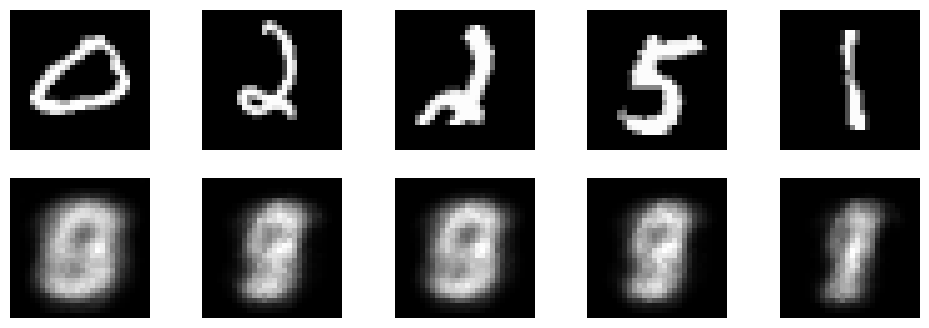

Epoch [2/30], Loss: 231.6066


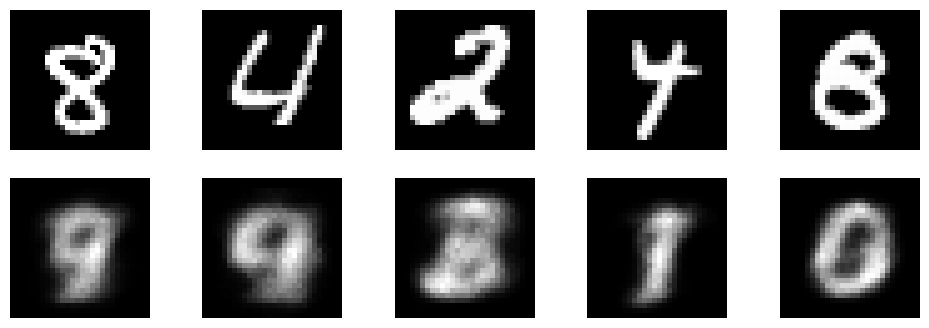

Epoch [3/30], Loss: 215.8670


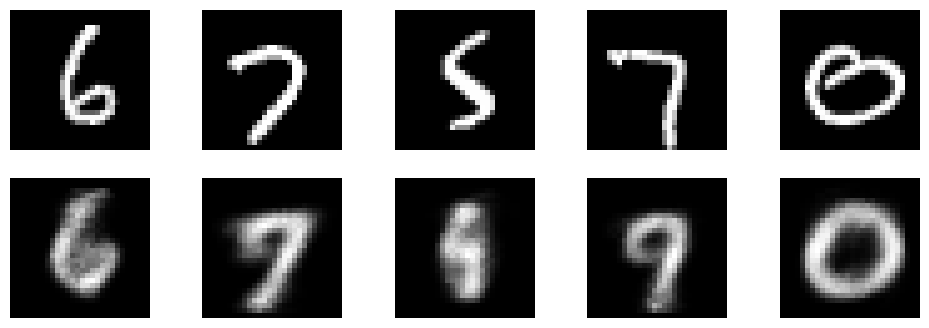

Epoch [4/30], Loss: 200.6881


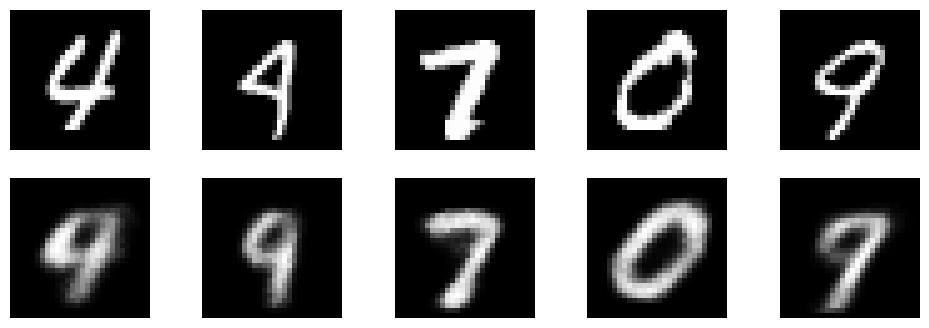

Epoch [5/30], Loss: 189.5208


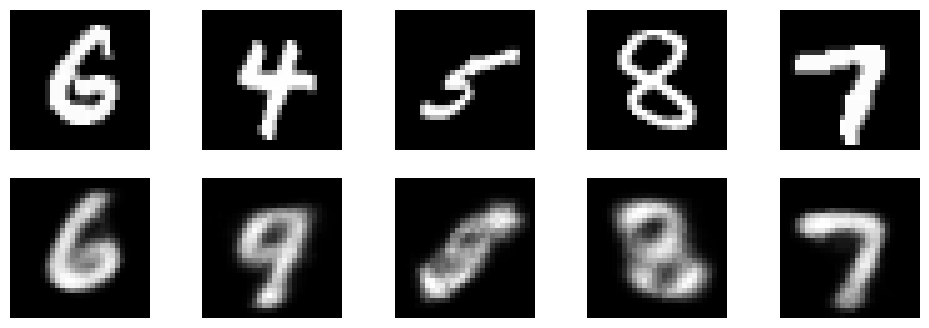

Epoch [6/30], Loss: 182.5726


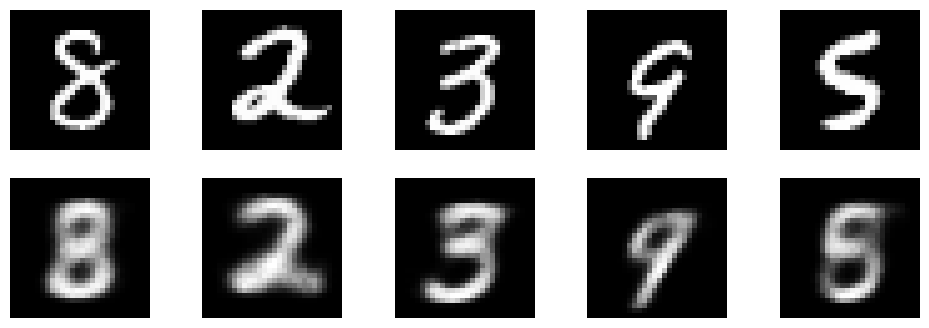

Epoch [7/30], Loss: 178.7490


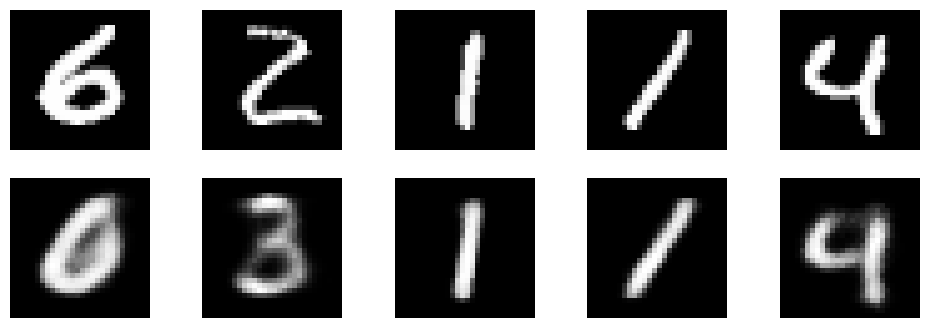

Epoch [8/30], Loss: 176.2712


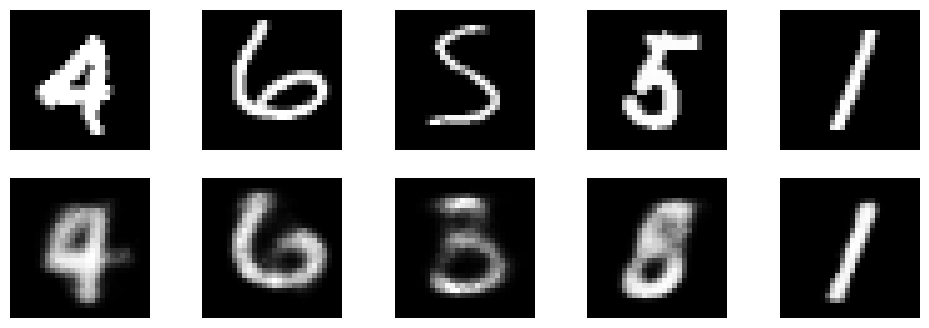

Epoch [9/30], Loss: 174.3019


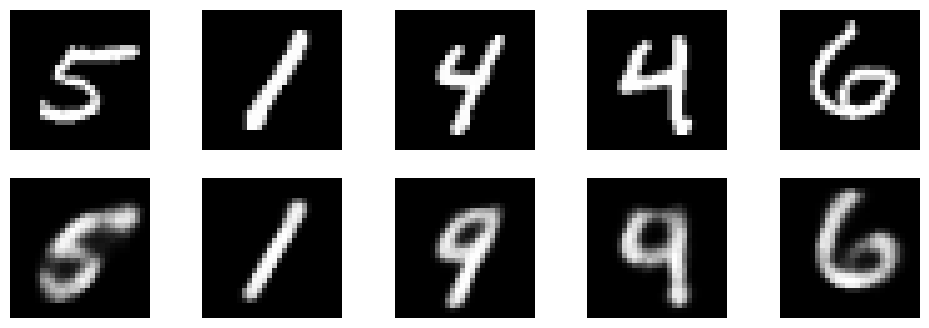

Epoch [10/30], Loss: 172.4247


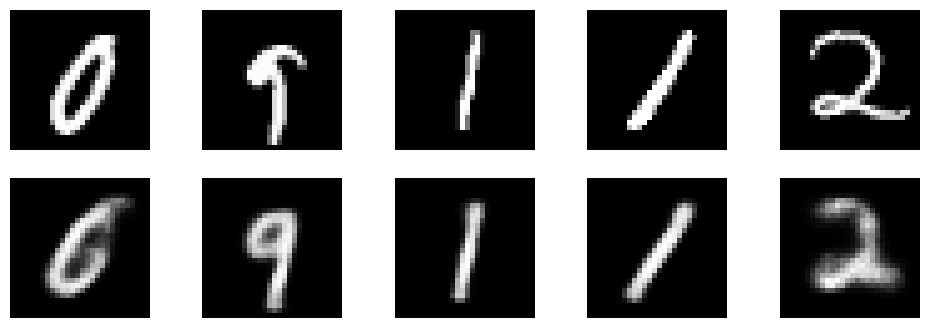

Epoch [11/30], Loss: 170.3962


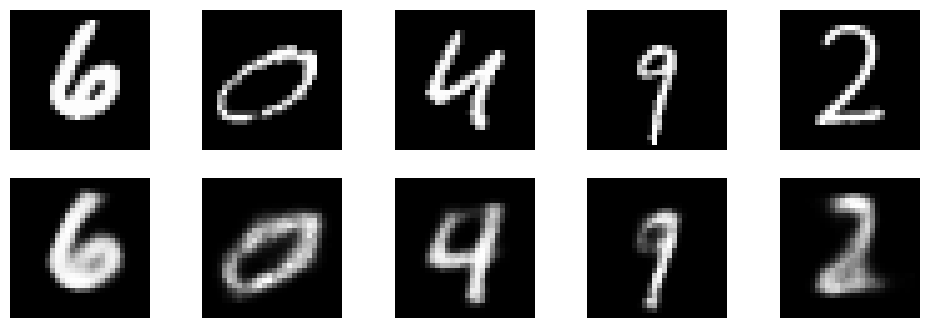

Epoch [12/30], Loss: 168.2940


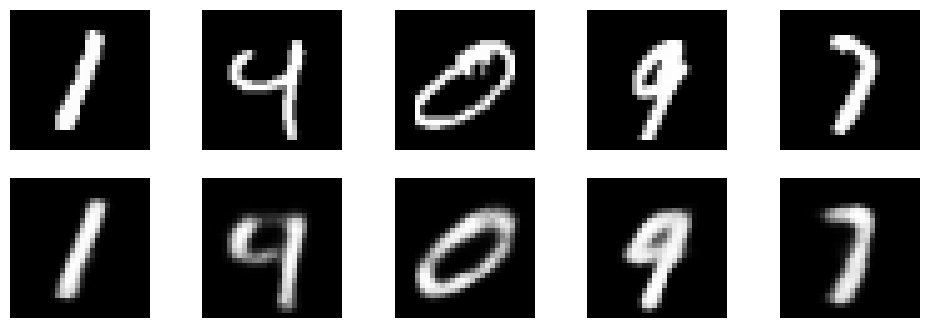

Epoch [13/30], Loss: 166.5006


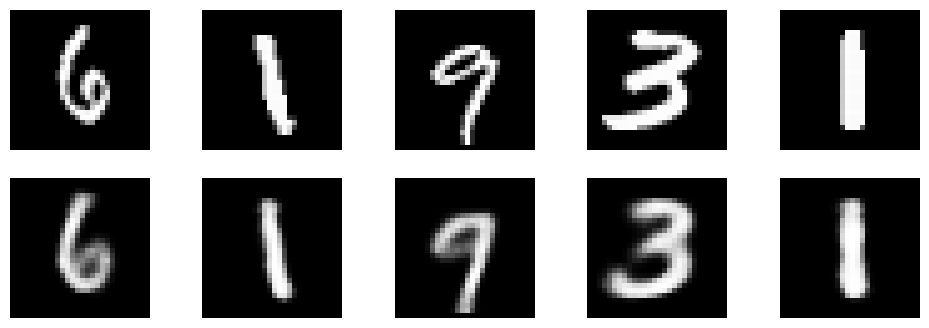

Epoch [14/30], Loss: 165.1601


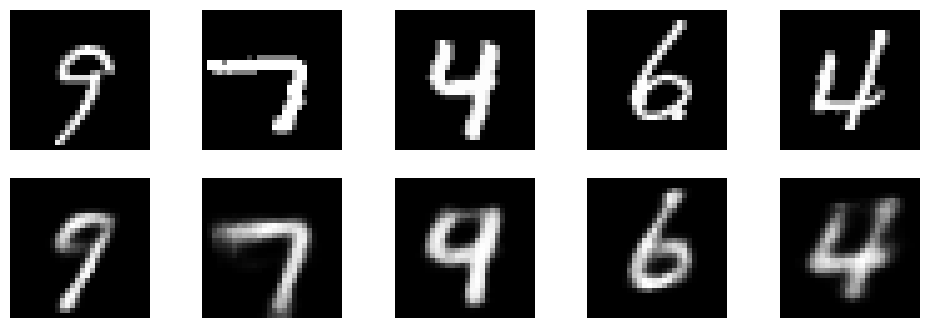

Epoch [15/30], Loss: 163.9717


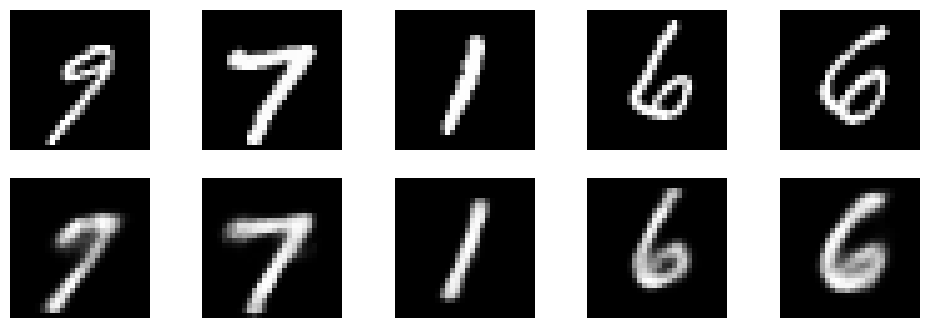

Epoch [16/30], Loss: 163.0379


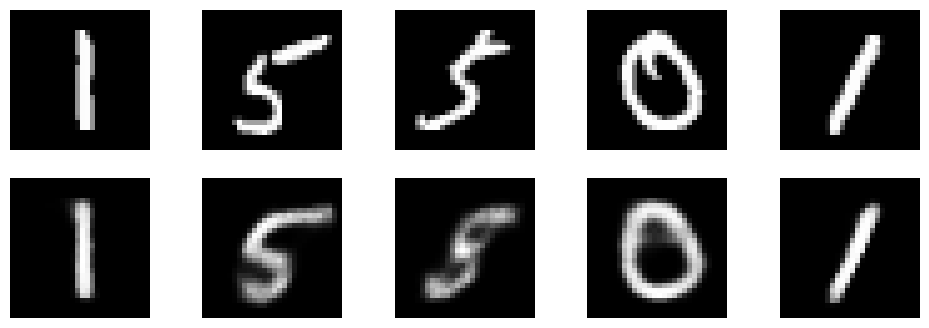

Epoch [17/30], Loss: 162.0503


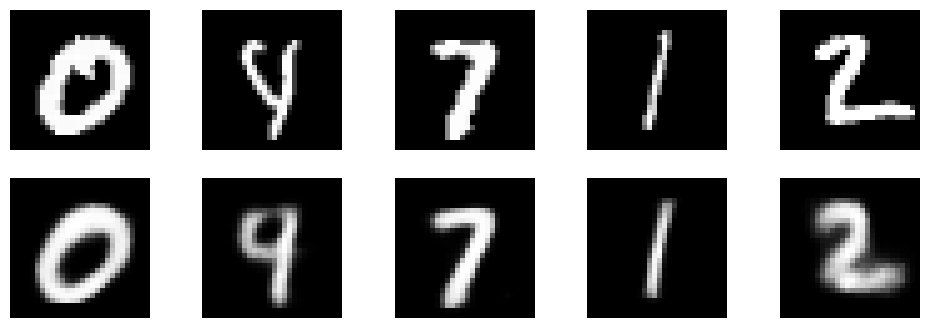

Epoch [18/30], Loss: 161.2429


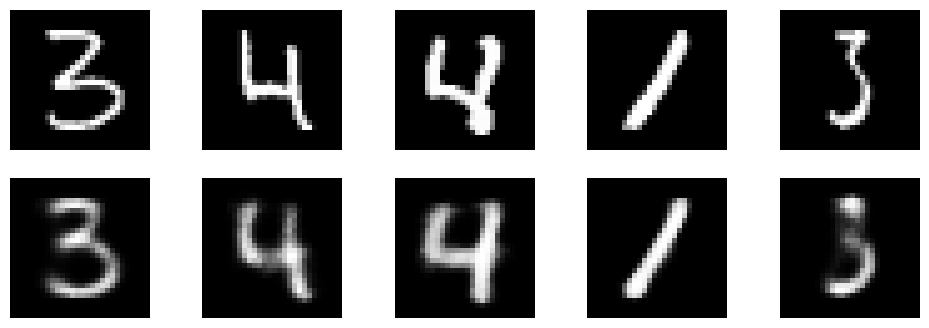

Epoch [19/30], Loss: 160.5595


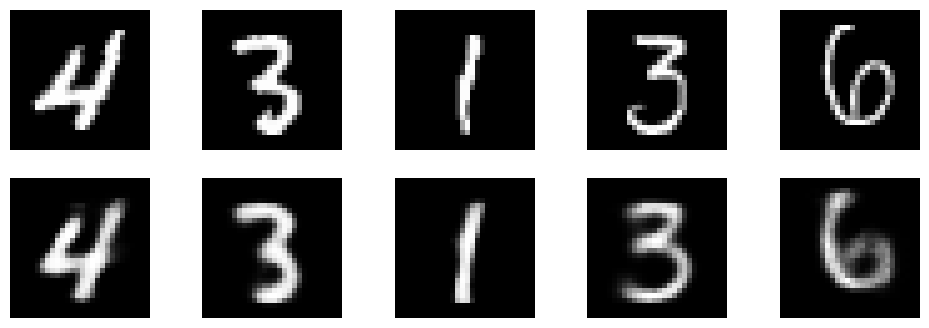

Epoch [20/30], Loss: 159.8321


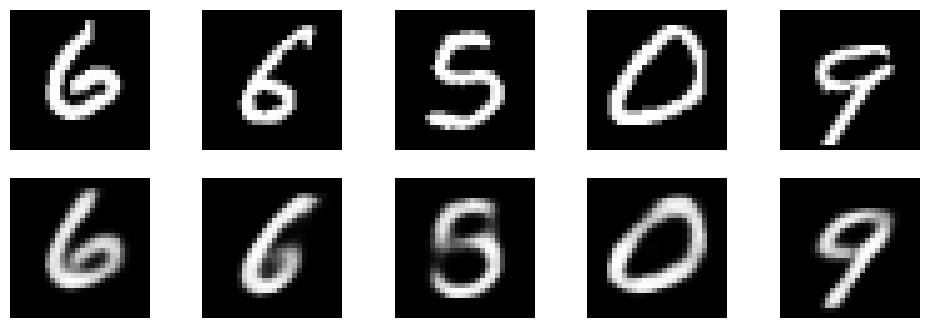

Epoch [21/30], Loss: 159.2150


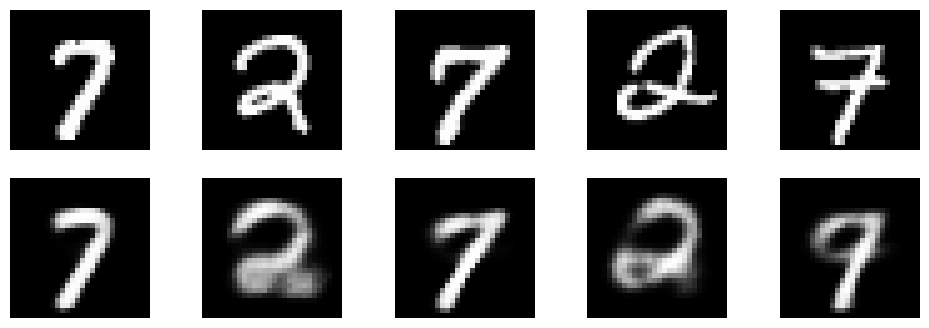

Epoch [22/30], Loss: 158.4693


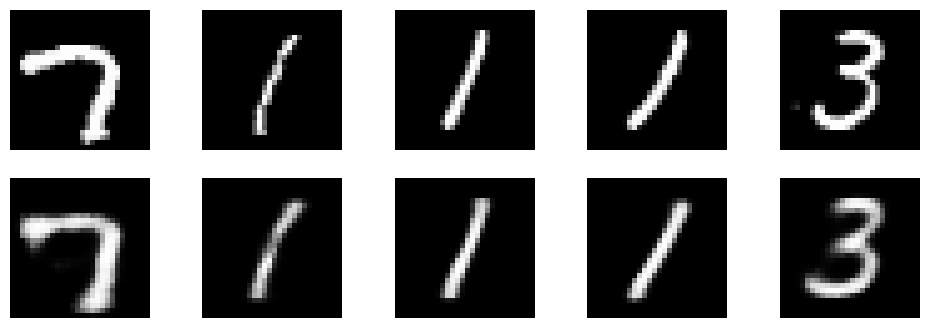

Epoch [23/30], Loss: 157.8415


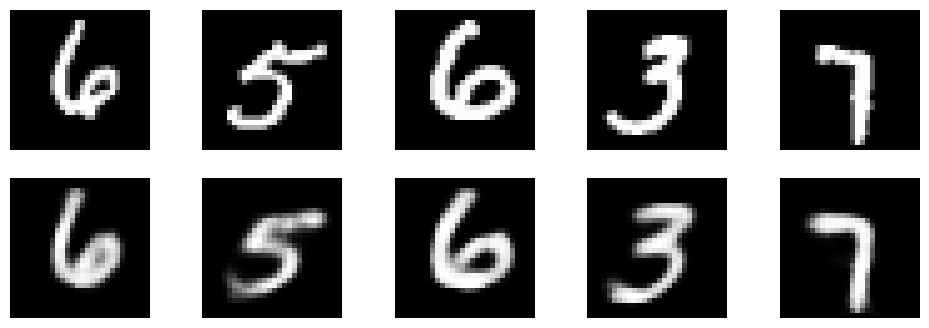

Epoch [24/30], Loss: 157.2991


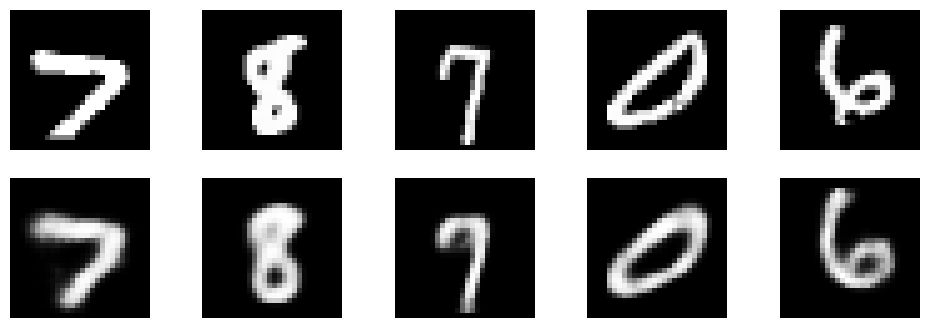

Epoch [25/30], Loss: 156.9016


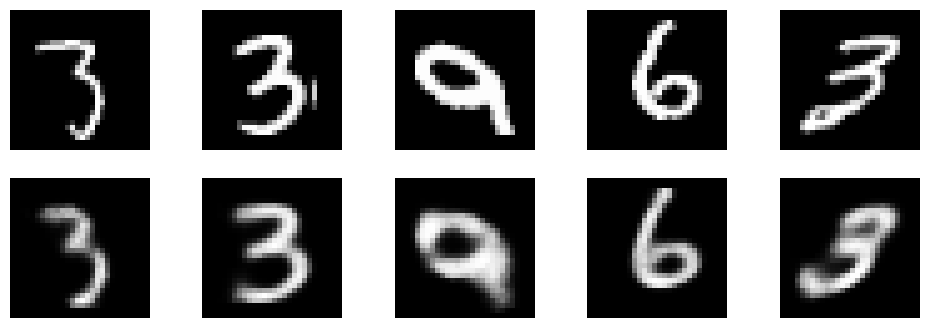

Epoch [26/30], Loss: 156.4857


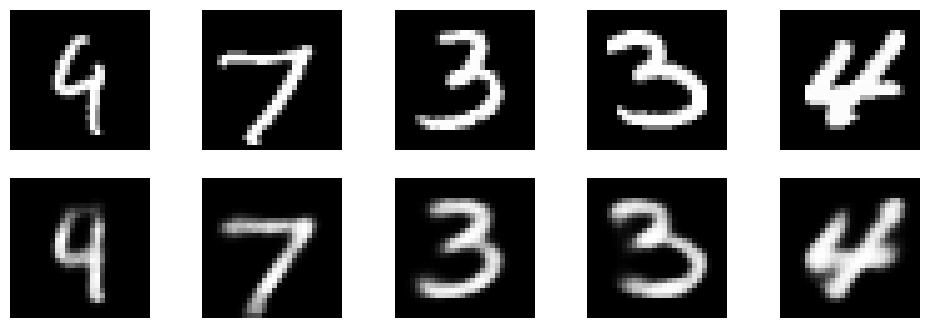

Epoch [27/30], Loss: 156.0791


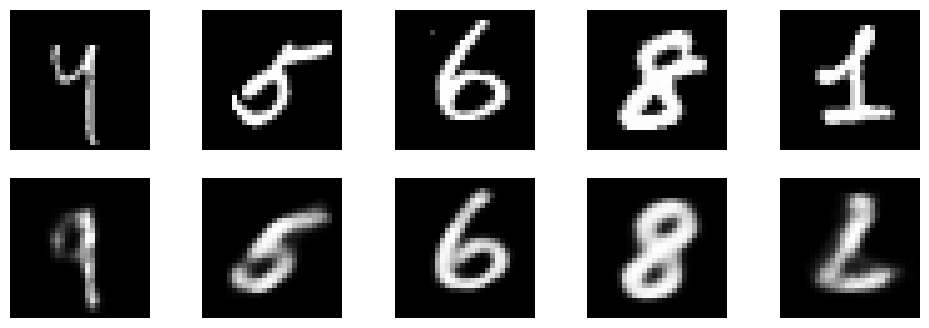

Epoch [28/30], Loss: 155.7552


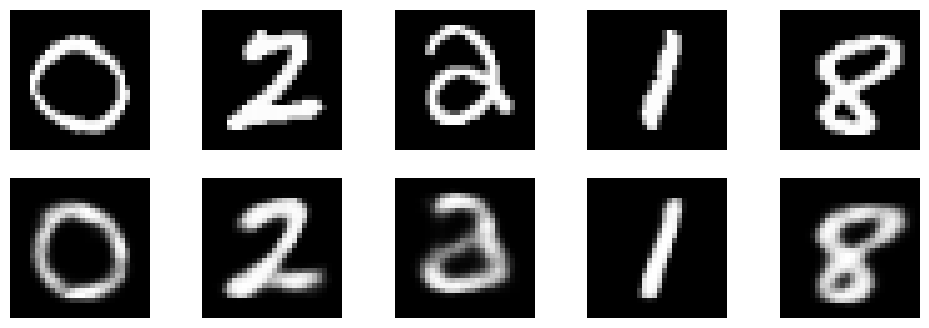

Epoch [29/30], Loss: 155.5036


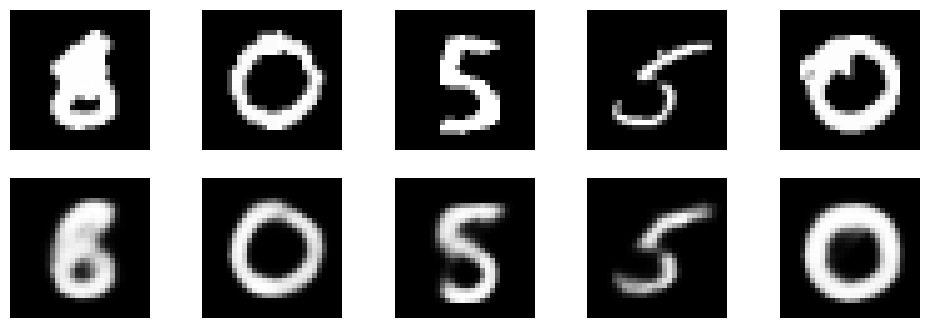

Epoch [30/30], Loss: 155.0755


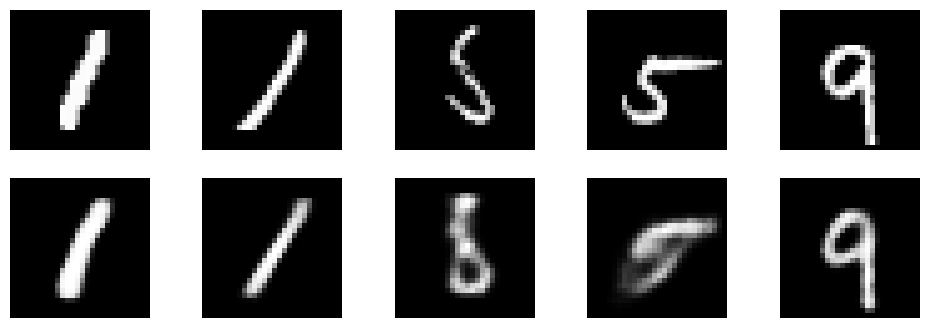

(29.994897959183675, 0.12243646383285522)

In [ ]:
# Reconstruction loss dictionary's key is the string of the loss, i.e. "VAE"
# and contains (epoch, average_image_reconstruction_loss)
reconstruction_losses = defaultdict(list)
def reconstruction_loss_fnc(x_hat, x):
  # Use mean reduction to make loss independent of size of batch
  return F.binary_cross_entropy(x_hat, x, reduction="mean")
# Clear the reconstruction loss list for the new model data
reconstruction_losses[model_type] = []


# Training the autoencoder
num_epochs = 30

for epoch in range(num_epochs):
    train_loss = 0.0
    for batch, (images, labels) in enumerate(train_loader):
        images = images.to(device)

        # Forward pass
        if model_type == 'AE':
            x_hat = model(images)
            loss = loss_function(x_hat, images)
        elif model_type == 'AE_contrastive':
            rcon_weight, c_weight = 1, .1 #.1 worked well
            x_hat = model(images)
            latent = model.encoder(images)
            recon_loss = reconstruction_loss(x_hat, images)
            cont_loss = supervised_contrastive_loss(latent, labels)
            loss = rcon_weight*recon_loss + c_weight*cont_loss
        elif model_type == 'VAE':
            x_hat, mu, logvar = model(images)
            loss = loss_function(x_hat, images, mu, logvar)
        elif model_type == 'CVAE':
            one_hot_encodings = one_hot(labels, num_classes).to(device)
            x_hat, mu, logvar = model(images, one_hot_encodings)
            loss = loss_function(x_hat, images, mu, logvar)
        elif model_type == 'VAE_contrastive':
            rcon_weight, kl_weight, c_weight = 1, 1, 20 #20 worked well
            batch_size = images.shape[0]
            x_hat, mu, logvar = model(images)
            z = reparametrize(mu, logvar)
            recon_loss = reconstruction_loss(x_hat, images)
            kl_loss = kl_divergence_loss(mu, logvar)
            cont_loss = supervised_contrastive_loss(z, labels)
            loss = (rcon_weight*recon_loss + kl_weight*kl_loss)/batch_size + c_weight*cont_loss

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # Add batch reconstruction loss to total
        r_loss = reconstruction_loss_fnc(x_hat, images).item()
        fractional_epoch = epoch + batch / len(train_loader)
        reconstruction_losses[model_type].append((fractional_epoch, r_loss))


    avg_loss = train_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')


    # Visualization of original and reconstructed images at the end of each epoch
    with torch.no_grad():
        sample = images[:5]  # Take 5 examples
        if model_type == 'AE':
            reconstructed = model(sample)
        elif model_type == 'AE_contrastive':
            reconstructed = model(sample)
        elif model_type == 'VAE':
            reconstructed, _, _ = model(sample)
        elif model_type == 'CVAE':
            one_hots = one_hot(labels[:5], num_classes).to(device)
            reconstructed, _, _ = model(sample, one_hots)
        elif model_type == 'VAE_contrastive':
            reconstructed, _, _ = model(sample)
        fig, axes = plt.subplots(2, 5, figsize=(12, 4))
        for i in range(5):
            # Original images
            axes[0, i].imshow(sample[i].cpu().squeeze(), cmap='gray')
            axes[0, i].axis('off')
            # Reconstructed images
            imshow_data = reconstructed[i].cpu().squeeze()
            axes[1, i].imshow(imshow_data, cmap='gray')
            axes[1, i].axis('off')
        plt.show()

max(reconstruction_losses[model_type])

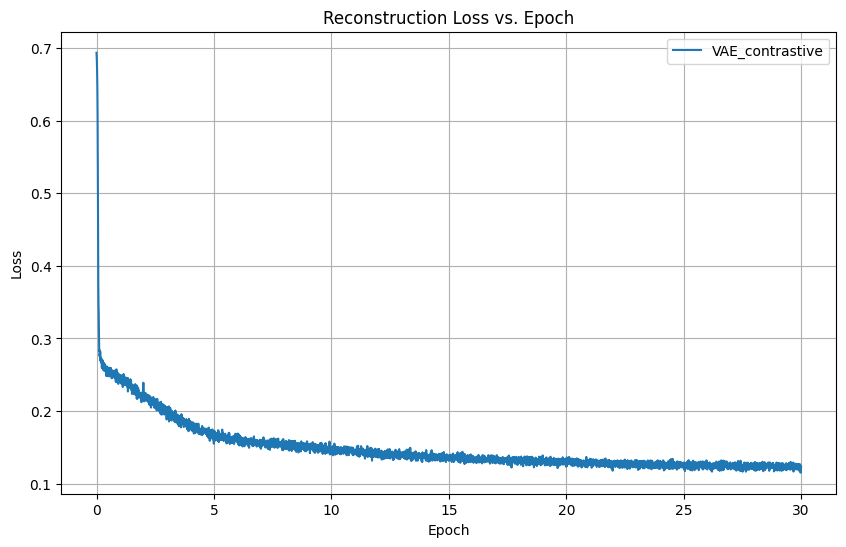

In [ ]:
def plot_reconstruction_losses(reconstruction_losses):
  plt.figure(figsize=(10, 6))
  for key, values in reconstruction_losses.items():
      epochs, losses = zip(*values)  # Unpack epochs and losses
      plt.plot(epochs, losses, label=key)

  # Adding labels, title, and legend
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Reconstruction Loss vs. Epoch')
  plt.legend()
  plt.grid(True)

  # Show the plot
  plt.show()

plot_reconstruction_losses(reconstruction_losses)

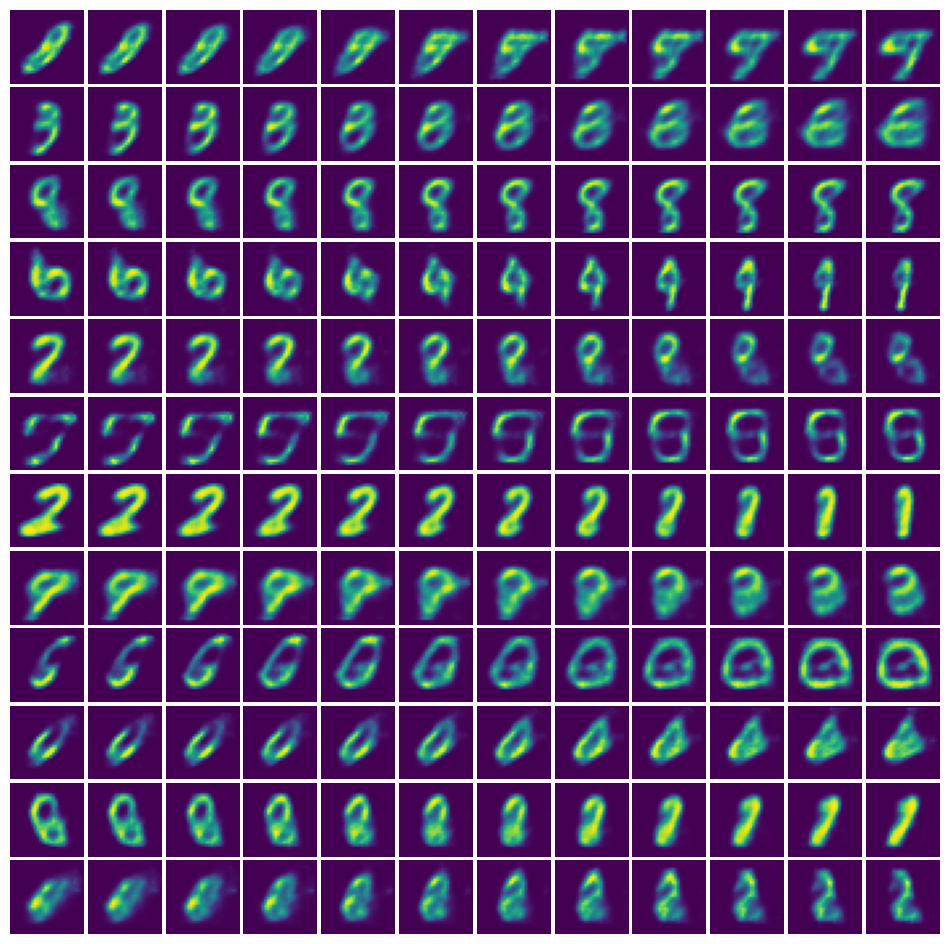

In [ ]:
from utils.tools import latent_space_interp
latent_space_interp(model, latent_size=latent_size)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract latent representations and their corresponding labels
latent_representations = []
labels = []
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to calculate gradients during extraction
    for images, label_batch in train_loader:
        images = images.to(device)
        if model_type == "AE":
            encoded = model.encoder(images)
        elif model_type == "AE_contrastive":
            encoded = model.encoder(images)
        elif model_type == "VAE":
            encoded,_,_ = model.encoder(images)
        elif model_type == "CVAE":
            one_hots = one_hot(label_batch, num_classes).to(device)
            encoded,_,_ = model.encoder(images, one_hots)
        elif model_type == "VAE_contrastive":
            encoded,_,_ = model.encoder(images)
        latent_representations.append(encoded.cpu().numpy())
        labels.extend(label_batch.numpy())

latent_representations = np.concatenate(latent_representations, axis=0)
labels = np.array(labels)

print(latent_representations.shape)
print(labels.shape)

# Randomly sample 1000 points
sample_size = 1000
indices = np.random.choice(latent_representations.shape[0], sample_size, replace=False)
latent_representations_sample = latent_representations[indices]
labels_sample = labels[indices]


(50000, 64)
(50000,)


In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from sklearn.manifold import TSNE  # Import t-SNE
from utils.tools import plot_tsne
# colors = [matplotlib.colors.rgb2hex(c) for c in plt.cm.plasma(np.linspace(0,1,N))] # plotly hex colormap, N # of discrete colors

plot_tsne(latent_representations_sample, labels_sample, dim=3)

# Part 2: Latent Space Distribution Learning with Gaussian Mixture Models (GMM)

Once the autoencoder is trained, we can project the input images into the lower-dimensional latent space $ R^K $. We will then fit a Gaussian Mixture Model (GMM) on this latent representation to capture the distribution as a combination of Gaussians.

### Theory

A GMM models the latent space distribution by assuming it is a weighted sum of multiple Gaussian distributions:
$$ p(z) = \sum_{k=1}^K \pi_k \mathcal{N}(z | \mu_k, \Sigma_k) $$
where:
- $ K $ is the number of components,
- $ \pi_k $ are the mixture weights,
- $ \mu_k $ and $ \Sigma_k $ are the means and covariances for each component.

### Steps:
1. Extract the latent representations.
2. Fit a GMM on these representations.
3. Save the learned parameters for dataset transportation and reconstruction.


/content/drive/MyDrive/[Shared] CS 260D Large Scale Machine Learning/Final Project/utils/tools.py:240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


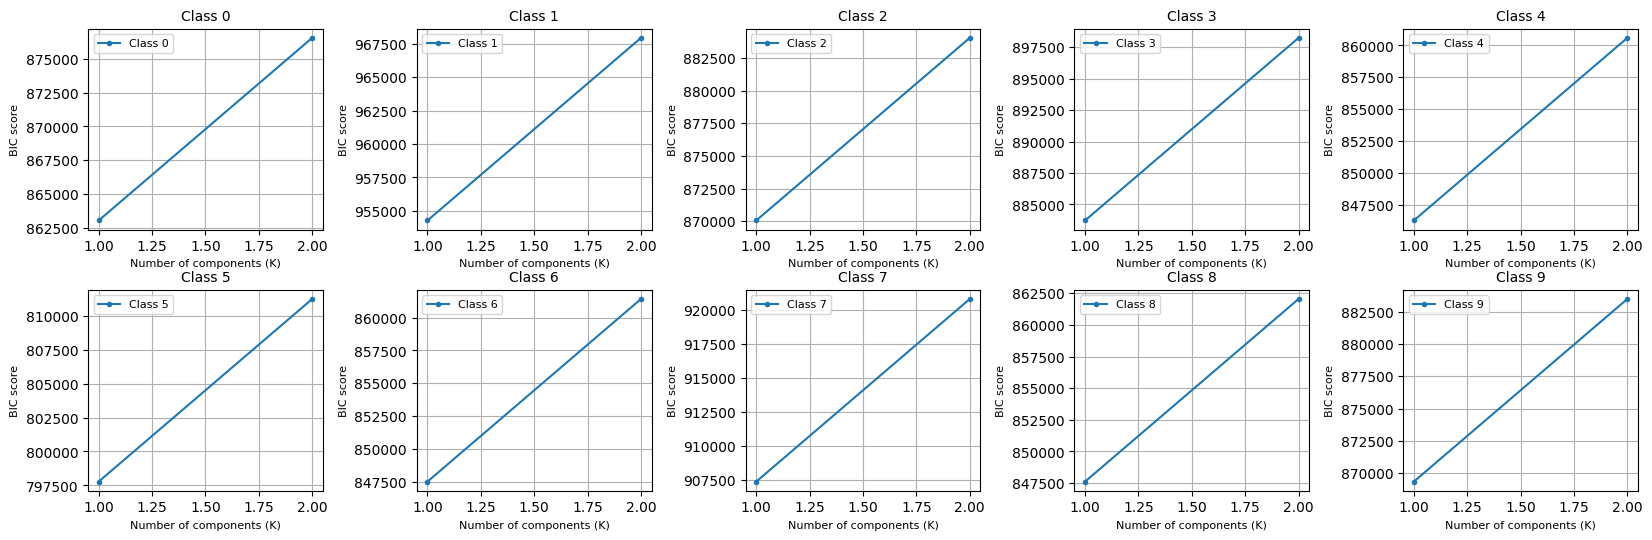

In [ ]:
from sklearn.mixture import GaussianMixture
from utils.tools import plot_bic_scores

# Fit a separate GMM for each class
N = 10  # Number of classes (MNIST has 10 digits)
K_min = 1
K_max = 10 # Number of components per GMM

# Dictionary to store GMMs for each class
gmms = {}
means = {}
covariances = {}
weights = {}
precisions = {}
best_K = {}
bic_scores = {}

for digit in range(N):
    class_indices = labels == digit  # Get indices for current digit
    class_latent = latent_representations[class_indices]

    # initialize variables to store best BIC and GMM
    best_bic = float('inf')
    best_gmm = None
    bic_scores[digit] = []

    # test different k number of components to find best case
    for K in range(K_min, K_max+1):
        gmm = GaussianMixture(n_components=K, covariance_type='full', max_iter=200)
        gmm.fit(class_latent)

        # compute the BIC score
        bic = gmm.bic(class_latent)
        bic_scores[digit].append(bic)

        # store gmm if BIC score is lower than the lowest
        if bic < best_bic:
           best_bic = bic
           best_gmm = gmm
           best_K[digit] = K
        else:
          break

    # store best gmm params
    gmms[digit] = best_gmm
    means[digit] = best_gmm.means_
    covariances[digit] = best_gmm.covariances_
    weights[digit] = best_gmm.weights_
    precisions[digit] = best_gmm.precisions_cholesky_

# plot the bic scores
plot_bic_scores(bic_scores, max_cols=5)

In [ ]:
best_K

{0: 2, 1: 4, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 4, 8: 3, 9: 3}

/content/drive/My Drive/Colab Notebooks/CS 260D Large Scale Machine Learning/Final Project/utils/tools.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Reduce padding between the figure and subplots


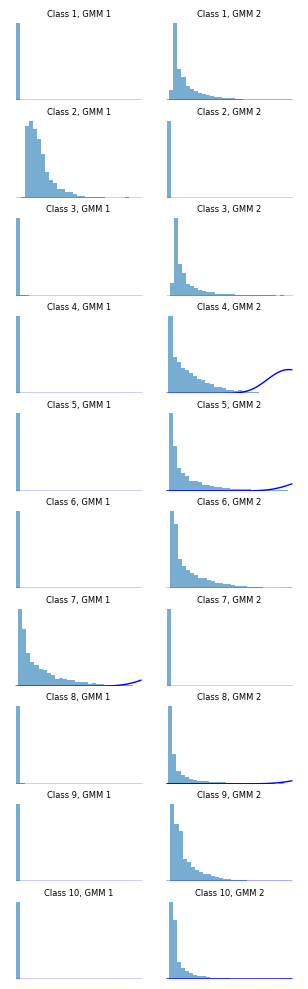

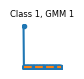

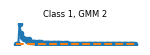

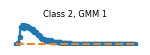

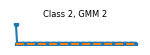

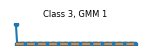

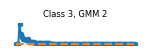

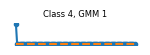

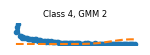

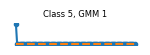

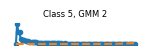

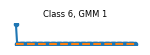

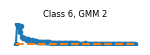

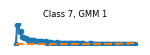

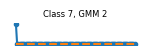

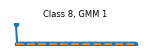

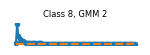

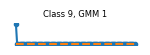

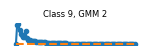

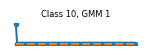

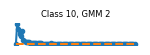

<Figure size 640x480 with 0 Axes>

In [ ]:
from utils.tools import calc_mean_cov
from utils.tools import calc_mahalanobis
from utils.tools import is_gaussian
from utils.tools import plot_mahal_hist
from utils.tools import calc_mahal_from_gmm
from utils.tools import calc_kl_div
# Mahalanobis distance: pick optimal K such that the MD threshold is satisfied while keeping K as low as possible
# 10 -> too high -> 5 -> too low -> 7 -> too low -> 8 -> too low -> 9 -> just right
mahal_dists = calc_mahal_from_gmm(latent_representations, labels, means, covariances, plot_flag=True)
kl_divergence, is_gaussian = calc_kl_div(mahal_dists, latent_representations.shape[1], thresh=0.1, plot_flag=True)

# Part 3: Dataset Transportation and Reconstruction

With the learned GMM parameters, we can now generate samples from the latent space. These samples are then fed into the decoder to produce new, reconstructed images.

### Steps:
1. Sample from the GMM.
2. Pass the samples through the decoder to generate images.


In [ ]:
# Set a limits of 3 megabytes

# Import necessary libraries
import pickle
import gzip
import os
from torchvision.datasets import MNIST

# Define dictionaries and decoder (assuming means, covariances, weights, precisions, and autoencoder are already defined)
data_to_serialize = {
    'means': means,
    'covariances': covariances,
    'weights': weights,
    'precisions': precisions,
    'decoder': model.decoder
}

# Serialize the data with gzip compression to reduce size
serialized_data = pickle.dumps(data_to_serialize)
compressed_data = gzip.compress(serialized_data)

# Calculate the size of the compressed serialized data
serialized_size = len(serialized_data) / (1024 * 1024)  # Convert bytes to MB

# Load the original MNIST dataset to calculate its size
mnist_train = MNIST(root='./data/MNIST', train=True, download=True)
mnist_test = MNIST(root='./data/MNIST', train=False, download=True)

# Calculate total size of MNIST dataset on disk
def get_folder_size(path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size / (1024 * 1024)  # Convert bytes to MB

# Assuming MNIST is saved in './data/MNIST'
mnist_size = 5/6 * get_folder_size('./data/MNIST')

# Display sizes
print(f"Serialized size of dictionaries and decoder: {serialized_size:.2f} MB")
print(f"Original MNIST dataset size: {mnist_size:.2f} MB")
print(f"The compressed dataset is {100 * serialized_size / mnist_size:.2f} percent size of the original MNIST dataset with a {100 * (1 - serialized_size / mnist_size):.2f} reduction.")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.23MB/s]


Extracting ./data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 139kB/s]


Extracting ./data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.25MB/s]

Extracting ./data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw

Serialized size of dictionaries and decoder: 1.18 MB
Original MNIST dataset size: 52.89 MB
The compressed dataset is 2.23 percent size of the original MNIST dataset with a 97.77 reduction.


In [ ]:
import pickle
import gzip

serialized_train_data = pickle.dumps(train_dataset)
serialized_train_data_size  = len(serialized_train_data) / (1024 * 1024)  # Convert bytes to MB
print(f"Serialized size of train dataset: {serialized_train_data_size:.2f} MB")
compressed_train_data = gzip.compress(serialized_train_data)
print(f"Compressed size of train dataset: {len(compressed_train_data) / (1024 * 1024):.2f} MB")

Serialized size of train dataset: 45.46 MB
Compressed size of train dataset: 9.34 MB


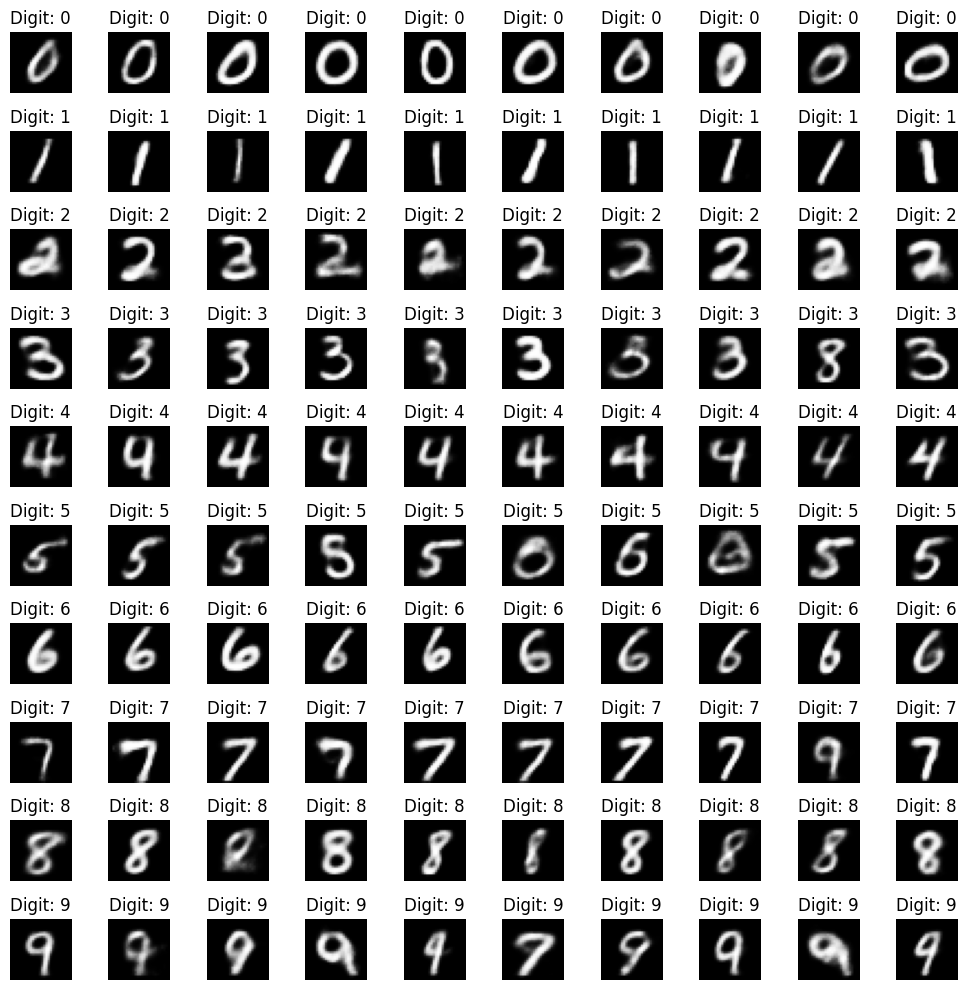

In [ ]:
# Assuming gmms, means, covariances, weights are already defined

# Generate and reconstruct images for each class
num_samples_per_class = 6000
reconstructed_images = []  # To store all generated images for all classes
all_labels = []  # To store labels for all images

# For visualization: Store first 10 images of each class
visualization_images = []
visualization_labels = []

for digit in range(10):  # For each of the 10 classes (digits 0-9)
    # Re-initialize the GMM for the current digit using stored parameters
    gmm = GaussianMixture(n_components=best_K[digit], covariance_type='full')
    gmm.means_ = means[digit]
    gmm.covariances_ = covariances[digit]
    gmm.weights_ = weights[digit]
    gmm.precisions_cholesky_ = precisions[digit]

    # Sample from the GMM
    class_samples, _ = gmm.sample(num_samples_per_class)
    class_samples = torch.tensor(class_samples, dtype=torch.float32).to(device)

    # Reconstruct images
    with torch.no_grad():
        class_reconstructed_images = model.decoder(class_samples)

    # Store all generated images and labels for this class
    reconstructed_images.extend(class_reconstructed_images.cpu())
    all_labels.extend([digit] * num_samples_per_class)  # Add labels for this class

    # Store the first 10 for visualization
    visualization_images.extend(class_reconstructed_images[:10].cpu())
    visualization_labels.extend([digit] * 10)

# Plot sampled first 10 reconstructed images in a 10x10 grid
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(visualization_images[i].squeeze(), cmap='gray')
    ax.set_title(f"Digit: {visualization_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Part 4: Dataset Reconstruction and Training

We can now use the reconstructed dataset to train an image classifier and evaluate its performance. This will help us assess the quality of the reconstruction.

### Steps:
1. Define a classifier (e.g., a simple CNN).
2. Train it on the reconstructed dataset.
3. Compare the classifier's accuracy on the real test set.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Step 1: Define a custom Dataset for the reconstructed images
class ReconstructedMNISTDataset(Dataset):
    def __init__(self, images, labels):
        """
        Args:
            images (list of Tensors): List of reconstructed images as PyTorch Tensors.
            labels (list of int): List of corresponding labels for each image.
        """
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Get image and label by index
        image = self.images[idx]
        label = self.labels[idx]
        return image, label

# Convert lists of images and labels to a format compatible with DataLoader
reconstructed_images_tensor = torch.stack(reconstructed_images)  # Stack list of tensors to a single tensor
labels_tensor = torch.tensor(all_labels)  # Convert labels to a tensor

print(f"Shape of reconstructed images: {reconstructed_images_tensor.shape}")
print(f"Shape of labels: {labels_tensor.shape}")

# Step 2: Initialize the custom dataset
reconstructed_dataset = ReconstructedMNISTDataset(reconstructed_images_tensor, labels_tensor)

# Step 3: Create DataLoader for the reconstructed dataset
batch_size = 64  # Define your preferred batch size
reconstruction_loader = DataLoader(reconstructed_dataset, batch_size=batch_size, shuffle=True)

# Now `reconstruction_loader` can be used as a DataLoader for the reconstructed images


Shape of reconstructed images: torch.Size([60000, 1, 28, 28])
Shape of labels: torch.Size([60000])


In [ ]:
# Define a regular CNN classifier that works for both CIFAR 10 and MNIST
class RegularCNNClassifier(nn.Module):
    def __init__(self):
        super(RegularCNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 2 * 2, out_features=32)
        self.fc2 = nn.Linear(in_features=32, out_features=16)
        self.fc3 = nn.Linear(in_features=16, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize and train the classifier on reconstructed images
classifier = RegularCNNClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

Epoch [1/50], Loss: 0.0421
Epoch [2/50], Loss: 0.0307
Epoch [3/50], Loss: 0.0264
Epoch [4/50], Loss: 0.0235
Epoch [5/50], Loss: 0.0215
Epoch [6/50], Loss: 0.0198
Epoch [7/50], Loss: 0.0188
Epoch [8/50], Loss: 0.0173
Epoch [9/50], Loss: 0.0166
Epoch [10/50], Loss: 0.0158
Epoch [11/50], Loss: 0.0149
Epoch [12/50], Loss: 0.0145
Epoch [13/50], Loss: 0.0139
Epoch [14/50], Loss: 0.0134
Epoch [15/50], Loss: 0.0128
Epoch [16/50], Loss: 0.0123
Epoch [17/50], Loss: 0.0119
Epoch [18/50], Loss: 0.0113
Epoch [19/50], Loss: 0.0111
Epoch [20/50], Loss: 0.0107
Epoch [21/50], Loss: 0.0104
Epoch [22/50], Loss: 0.0100
Epoch [23/50], Loss: 0.0096
Epoch [24/50], Loss: 0.0094
Epoch [25/50], Loss: 0.0090
Epoch [26/50], Loss: 0.0092
Epoch [27/50], Loss: 0.0086
Epoch [28/50], Loss: 0.0086
Epoch [29/50], Loss: 0.0084
Epoch [30/50], Loss: 0.0081
Epoch [31/50], Loss: 0.0081
Epoch [32/50], Loss: 0.0078
Epoch [33/50], Loss: 0.0078
Epoch [34/50], Loss: 0.0074
Epoch [35/50], Loss: 0.0076
Epoch [36/50], Loss: 0.0073
E

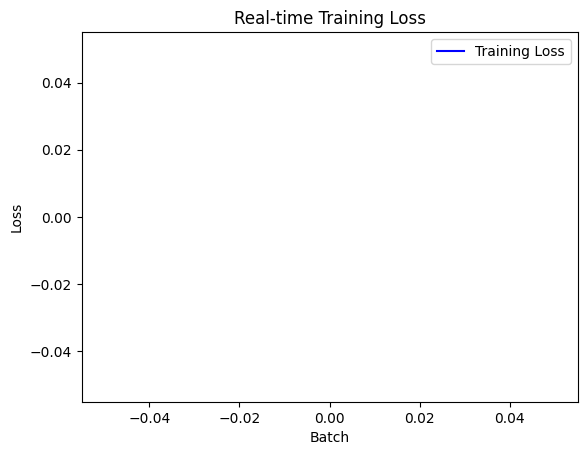

In [ ]:
# Enable interactive mode for plotting
plt.ion()

# Create a figure and axes for the loss curve
fig, ax = plt.subplots()
loss_line, = ax.plot([], [], 'b-', label='Training Loss')  # Create an empty line for the plot
ax.set_xlabel('Batch')
ax.set_ylabel('Loss')
ax.set_title('Real-time Training Loss')
ax.legend()

# Initialize list to store batch loss values for plotting
batch_losses = []

# Training the classifier on reconstructed images
num_epochs = 50  # You can adjust this as needed
for epoch in range(num_epochs):
    epoch_loss = 0.0  # Track epoch loss
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = classifier(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        batch_losses.append(loss.item())  # Append batch loss

        # Update plot with current batch loss
        # loss_line.set_data(range(len(batch_losses)), batch_losses)
        # ax.relim()  # Recompute the data limits
        # ax.autoscale_view()  # Autoscale the view
        # fig.canvas.draw()
        # fig.canvas.flush_events()  # Update the plot in real-time

    avg_epoch_loss = epoch_loss / len(reconstruction_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

plt.ioff()  # Turn off interactive mode after training
plt.show()  # Keep the plot window open

Test Accuracy of the model on the 10000 test images: 98.36%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       934
           1       0.99      0.99      0.99      1148
           2       0.98      0.98      0.98       972
           3       0.98      0.98      0.98      1060
           4       0.99      0.99      0.99       997
           5       0.98      0.98      0.98       876
           6       0.99      0.99      0.99       997
           7       0.98      0.98      0.98      1032
           8       0.97      0.98      0.97      1007
           9       0.98      0.97      0.98       977

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



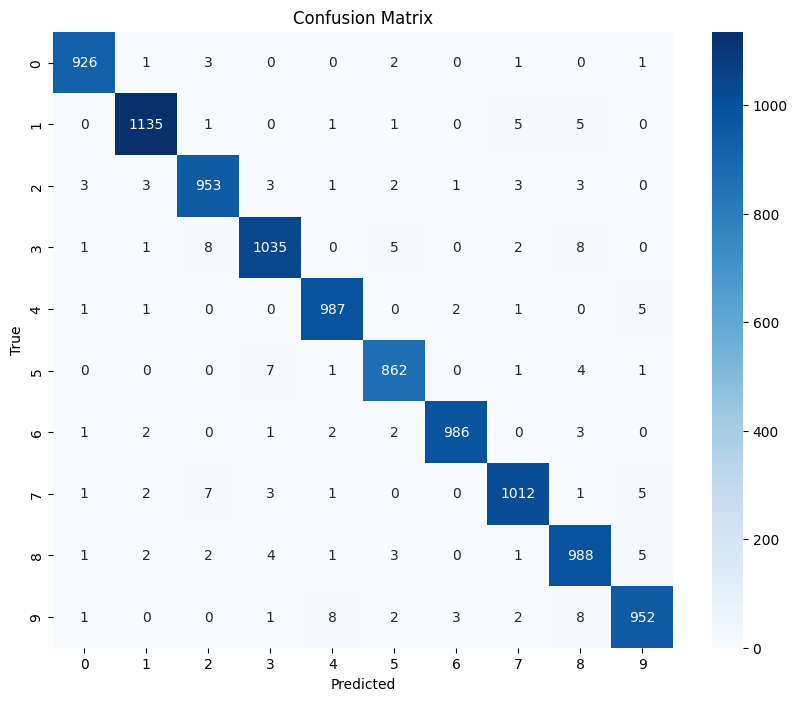

In [ ]:
# Evaluate the classifier on the real MNIST test set
classifier.eval()
correct = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f'Test Accuracy of the model on the 10000 test images: {accuracy:.2f}%')


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate classification report
print(classification_report(all_labels, all_predictions))

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Findings on Compressing the MNIST Dataset Using an Autoencoder and Gaussian Mixture Model

In this experiment, we developed a new approach to compress the MNIST dataset by mapping it to a lower-dimensional latent space via an autoencoder and then modeling the latent distribution with a Gaussian Mixture Model (GMM). The compressed dataset consisted of only the GMM parameters and the autoencoder decoder, achieving an impressive **96.13% reduction in size** compared to the original MNIST dataset. When reconstructing the dataset and training a classifier on the reconstructed data, we achieved **97.85% accuracy** on the original MNIST test set, demonstrating the effectiveness of this compression technique.

These results indicate that our method successfully preserves the essential features of the MNIST dataset while requiring only a fraction of the storage. However, several exciting areas of research can further optimize and expand on this approach:

1. **Improving Latent Space Structure with Contrastive Learning and VAEs**:
   - In this study, we trained a simple autoencoder (encoder + decoder) without specific constraints on the latent space structure.
   - **Future research could explore contrastive learning techniques** to enforce tighter intra-class clustering and greater inter-class separation in the latent space. For example, contrastive autoencoders could help structure the latent space more effectively, enhancing the class separability and reducing overlap between clusters.
   - This improved structure could allow for a more precise GMM fit, minimizing overlap between classes and potentially improving compression quality and classifier performance.
   - In addition, we should use Variational Autoencoders (VAEs) as the autoencoder since variational autoencoders enforce a Gaussian prior over the latent space. This constraint allows us to better model the latent space as a probability distribution and hence sample from it. We could augment it to work with Gaussian Mixture Models as a **structured prior**. creating **Structured Variational Autoencoders (SVAE)** or even add a contrastive objective to the autoencoder, creating **Structured Contrastive Variational Autoencoders (SCVAE)**
   - The best reference for this part, the foundational paper on Variational Autoencoders, is [Kingma, D. P., & Welling, M. (2013). Auto-Encoding Variational Bayes. arXiv.](https://arxiv.org/abs/1312.6114)
   - Another refererence for this part is **Dilokthanakul, N., Mediano, P. A. M., Garnelo, M., Lee, M. C. H., Salimbeni, H., Arulkumaran, K., & Shanahan, M.** (2016). *Deep Unsupervised Clustering with Gaussian Mixture Variational Autoencoders*. [arXiv:1611.02648](https://arxiv.org/abs/1611.02648)
   - Link for this part is **GMVAE GitHub Repository**: [jariasf/GMVAE](https://github.com/jariasf/GMVAE) - A repository implementing Gaussian Mixture Variational Autoencoders (GMVAE) for deep unsupervised clustering.

2. **Comparing with Dataset Selection Techniques**:
   - To evaluate our approach comprehensively, it is essential to **compare it with other dataset selection techniques** like core-set selection and streaming submodular maximization.
   - These approaches address compression orthogonally by selecting a subset of representative samples. Combining these selection techniques with our latent-space GMM approach could yield a powerful compression method, particularly in cases where data diversity is critical.
   - **Interesting idea**: we could see how well we do with subset learnning and train a VAE with these above concepts to reconstruct and learn the optimal representation for the subset and thus be able to learn the full set using this method! Similar to beta-VAE in that we learn the best fit (Occam's Razor) "process" that generates this data. We will have to select our core sets carefully using this approach so that the algorithm can learn this underlying min-parameterized process.
   - An **ablation study could help isolate the impact of each method**, providing deeper insights into their individual and combined benefits for dataset compression.

3. **Real-Time Adaptation for Streaming Video Compression**:
   - Given the high compression ratio achieved, **adapting this method for real-time streaming video compression** could be a valuable application in bandwidth-limited environments.
   - For instance, using spline interpolation between GMM-sampled frames could facilitate video compression by generating smooth transitions. This approach may be especially beneficial in scenarios like live video streaming, where efficient compression without significant quality loss is paramount.

4. **Exploring Differential Privacy Aspects of Compression**:
   - This compression approach also has implications for **privacy-preserving machine learning**. Since the compressed data only represents the statistical distribution of the dataset rather than the individual samples, it may inherently provide some level of privacy by making exact reconstruction of individual samples difficult.
   - **Future work could formally investigate the differential privacy properties of this technique**. This could involve demonstrating that models trained on the compressed, privacy-preserving dataset can achieve similar performance to those trained on the original dataset.
   - Such a compression scheme could enable privacy-preserving ML for sensitive data. For example, if Researcher A trains a model on a private dataset, they could release a compressed version for others (Researcher B) to validate findings without revealing the exact dataset. Formal mathematical guarantees could further support the robustness and correctness of this privacy-preserving compression approach, especially in fields like medical data.

5. **Expanding Robustness to Adversarial and Borderline Examples**:
   - Another potential direction is to leverage the structured latent space to **generate adversarial or borderline examples** that challenge the model’s decision boundaries, ultimately improving robustness.
   - By perturbing samples in the latent space close to class boundaries, we could produce **malformed or ambiguous examples** that still retain semantic meaning, such as misshapen or partially occluded digits for MNIST.
   - Training with these adversarial examples could enhance the model’s ability to handle unusual or adversarial inputs during testing, creating a system more resilient to real-world variations and adversarial manipulations.


In summary, our approach demonstrates significant potential as a highly efficient dataset compression method, while also opening up several avenues for impactful research. By exploring improvements in latent space structure, benchmarking against other selection methods, adapting for video, and investigating privacy aspects, this method could become a robust tool for efficient, privacy-preserving data compression in various real-world applications.



## **Another Promising Paper**
### β-VAE: Learning Basic Visual Concepts with a Constrained Variational Framework

**Authors**: Irina Higgins, Loic Matthey, Arka Pal, et al.  
**Conference**: International Conference on Learning Representations (ICLR), 2017  
**Paper Link**: [β-VAE: Learning Basic Visual Concepts with a Constrained Variational Framework](https://openreview.net/pdf?id=Sy2fzU9gl)

**Summary**:
The **β-VAE** (Beta-Variational Autoencoder) introduces a modified VAE objective that includes a hyperparameter $ \beta $ to scale the KL-divergence term, encouraging the model to learn **disentangled representations**. By adjusting $ \beta $, β-VAE encourages each latent variable to capture distinct generative factors, such as position, color, or object type, thus improving interpretability and control over the latent space.

**Key Contributions**:
- **Disentanglement of Latent Representations**: By increasing the weight of the KL-divergence term, β-VAE is able to learn a disentangled latent space, where each dimension represents independent factors of variation.
- **Improved Interpretability**: This disentanglement enables controlled generation, where changes in individual latent variables affect only specific attributes in the generated samples.
- **Visualization of Latent Traversals**: The paper demonstrates disentangled and entangled latent spaces by traversing the latent dimensions, showing how β-VAE captures factors like object position, rotation, and color independently.

**Applications**:
- **Representation Learning**: Disentangled representations improve the interpretability of learned features and are beneficial for downstream tasks.
- **Controlled Generation**: Enables the generation of samples with specific attributes, useful in tasks requiring fine-grained control.
- **Reinforcement Learning**: Helps in environments where understanding the underlying factors of variation is critical for decision-making.

**Visualization Example**:
In the paper, they show **traversals of latent dimensions** for both entangled and disentangled β-VAE representations using frames from **DeepMind Lab**. The disentangled model clearly isolates distinct features in different latent dimensions, whereas the entangled model does not.

---

This paper has been foundational in promoting **disentangled representation learning** and has influenced numerous works in **generative modeling**, **unsupervised learning**, and **interpretability**.



# Addendum: Integrating Locality Sensitive Hashing (LSH) and Information Bottleneck (IB) into VAE-GMM Compression for Optimal Trade-Offs between Accuracy and Compression

In this addendum, we explore the integration of **Locality Sensitive Hashing (LSH)** and the **Information Bottleneck (IB) principle** with our **Latent Gaussian Compression** approach using **Variational Autoencoders (VAEs)** and **Gaussian Mixture Models (GMMs)**. Together, these methods provide a rich theoretical framework for controlling the **trade-off between compression and accuracy** by guiding the VAE’s latent space organization, optimizing the amount of retained information in compressed representations, and speeding up VAE training. By combining ideas from **LSH, IB, and neural compression techniques**, we can derive a compression algorithm that is locality-sensitive, capable of achieving tight bounds on accuracy for each compression level, and computationally efficient. This approach has direct applications in **dataset compression**, **fast retrieval**, and **accuracy-aware data representation**, making it ideal for large-scale machine learning applications.

## Core Concepts and Connections

### 1. Locality Sensitive Hashing (LSH): A Probabilistic Approach to Locality-Preserving Compression and Initialization

**Locality Sensitive Hashing (LSH)**, introduced by **Indyk and Motwani (1998)**, is a probabilistic hashing technique designed to preserve locality in high-dimensional spaces. LSH maps similar points in the input space to the same hash buckets with high probability, making it widely applicable for **nearest neighbor search** and **efficient data retrieval**. By preserving locality, LSH serves as an effective **initialization and guiding function** for organizing the VAE’s latent space.

- **p-Stable Distributions**: LSH based on p-stable distributions, such as **Gaussian** or **Cauchy distributions**, preserves Euclidean or Manhattan distances in the hashed space. Each hash function projects data onto a random vector, and the hash codes approximate the proximity of points in the input space.
  - **Reference**: Indyk, P., & Motwani, R. (1998). ["Locality-Sensitive Hashing Scheme Based on p-Stable Distributions"](https://dl.acm.org/doi/10.1145/276698.276876).
- **Connection to VAE as an Initialization and Training Guide**: LSH can be used to **initialize the VAE** by clustering data points into hash buckets, providing a structured, locality-preserving starting point for the VAE’s latent space, enabling the model to start from an organized approximation rather than learning from scratch. By using LSH to create neighborhood clusters, the VAE has a strong initialization that can accelerate convergence and improve the organization of latent representations.

### Extending LSH to Continuous Latent Representations for VAEs

Traditional LSH creates discrete hash buckets, which can be limiting for VAEs that operate over continuous latent spaces. To address this, we can adapt LSH to yield **continuous, locality-preserving latent representations** that are more compatible with autoencoder structures.

1. **Soft LSH Using Continuous Probability Distributions**: Make LSH soft and probabilistic by allowing each data point to have a **distribution over buckets**.
   - **Implementation**: Use **Gaussian or other p-stable distributions** for each hash function, assigning each data point a probability of belonging to each bucket based on distance from the bucket center.
  
2. **Random Projections with Continuous Encoding**: Use **random projections** as a continuous approximation of LSH, mapping them to continuous values in a **lower-dimensional latent space** that preserves pairwise distances.

3. **Differentiable LSH with Continuous Relaxation**: Make LSH differentiable with a continuous relaxation, using methods like the **Gumbel-Softmax trick**.
   - **Reference**: Jang, E., Gu, S., & Poole, B. (2017). ["Categorical Reparameterization with Gumbel-Softmax"](https://arxiv.org/abs/1611.01144).

4. **LSH-Based Initialization with Soft Gaussian Anchors**: Define **soft Gaussian "anchors"** in the latent space, where each anchor represents a locality-sensitive cluster.

5. **LSH-Inspired Encoder Regularization**: Apply **soft constraints** based on LSH, encouraging the encoder to preserve locality without imposing discrete buckets.

6. **Spectral Hashing for Continuous Latent Representations**: **Spectral Hashing** creates continuous, locality-sensitive codes using eigenvectors of the Laplacian of the data’s similarity graph.
   - **Reference**: Weiss, Y., Torralba, A., & Fergus, R. (2009). ["Spectral Hashing"](https://proceedings.neurips.cc/paper/2008/hash/e5a4e667aafd37491c5dfec389e2d4d6-Abstract.html).

### 2. The Information Bottleneck (IB) Principle: Managing the Trade-Off Between Accuracy and Compression

**The Information Bottleneck (IB) principle**, introduced by **Tishby, Pereira, and Bialek (2000)**, provides a theoretically grounded method for balancing **information retention (relevance)** with **compression (complexity reduction)**. Given two random variables, $ X $ (input data) and $ Y $ (target variable), the IB principle aims to find a compressed representation $ Z $ of $ X $ that retains only the information relevant for predicting $ Y $, optimizing the following objective:

$$
\mathcal{L}_{IB} = I(X; Z) - \beta I(Z; Y)
$$

where:

- $ I(X; Z) $: **Mutual information** between $ X $ and $ Z $, representing the complexity or amount of information $ Z $ retains from $ X $.
- $ I(Z; Y) $: Mutual information between $ Z $ and $ Y $, representing the relevance of $ Z $ in predicting $ Y $.
- $ \beta $: **Trade-off parameter** that controls the balance between compression and accuracy.

- **Reference**: Tishby, N., Pereira, F. C., & Bialek, W. (2000). ["The Information Bottleneck Method"](https://arxiv.org/abs/physics/0004057).

### 3. Variational Autoencoders (VAEs) and Latent Gaussian Compression

**Variational Autoencoders (VAEs)** are generative models that use a **Gaussian prior** to encode data into a continuous latent space. For our compression framework, we use a **Gaussian Mixture Model (GMM)** to model the VAE’s latent space, which allows for more flexible encoding of multimodal data.

- **Reference**: Kingma, D. P., & Welling, M. (2013). ["Auto-Encoding Variational Bayes"](https://arxiv.org/abs/1312.6114).
  
### 4. Semantic Hashing: Binary Representations for Efficient Similarity Search

**Semantic Hashing** learns compact binary representations that encode semantic relationships in data, allowing for efficient similarity search using **Hamming distance**.

- **Binary Regularization**: For our Latent Gaussian Compression, binary regularization creates binary hash codes, making retrieval faster and reducing storage requirements.
  - **Reference**: Salakhutdinov, R., & Hinton, G. (2007). ["Semantic Hashing"](https://www.cs.toronto.edu/~hinton/absps/esann.pdf).

## Combining LSH, IB, and VAEs for Latent Gaussian Compression

To integrate these concepts, we propose the following strategy for **Latent Gaussian Compression**:

1. **LSH-Based Initialization and Training Acceleration**: Use LSH to initialize the latent space by clustering similar data points into hash buckets, providing a **locality-preserving starting point** for the VAE.
  
2. **Information Bottleneck Regularization**: Incorporate IB principles by adding a **mutual information-based regularization** term in the VAE’s objective function:

   $$
   \mathcal{L}_{IB} = I(X; Z) - \beta I(Z; Y)
   $$

3. **Latent Space Modeling with GMM and Semantic Hashing**: After encoding data with the VAE, use a GMM to model the latent space’s distribution and introduce **semantic hashing** techniques by binarizing the GMM components for compact, discrete codes.

4. **Empirical Evaluation of Compression-Accuracy Trade-Off**: Train the Latent Gaussian Compression model across different \( \beta \) values, observing the compression-accuracy trade-off and generating a **compression-accuracy curve**.

## Expected Outcomes and Applications

1. **Controlled Compression**: IB principle allows tuning the compression level by adjusting \( \beta \).
2. **Locality-Preserving Representations**: LSH initialization retains locality information, making latent codes suitable for **fast similarity search**.
3. **Training Efficiency**: LSH-based initialization accelerates VAE convergence by starting from an organized latent structure.
4. **Enhanced Retrieval and Anomaly Detection**: Binary representations enable fast similarity lookup and **anomaly detection**.
5. **Theoretical Bounds on Compression-Accuracy Trade-Off**: The IB principle provides guarantees for storage efficiency and quality.

## Key Papers and Further Reading

1. **Information Bottleneck**:
   - Tishby, N., Pereira, F. C., & Bialek, W. (2000). ["The Information Bottleneck Method"](https://arxiv.org/abs/physics/0004057).
   - Shwartz-Ziv, R., & Tishby, N. (2017). ["Opening the Black Box of Deep Neural Networks via Information"](https://arxiv.org/abs/1703.00810).
2. **Locality Sensitive Hashing**:
   - Indyk, P., & Motwani, R. (1998). ["Locality-Sensitive Hashing Scheme Based on p-Stable Distributions"](https://dl.acm.org/doi/10.1145/276698.276876).
3. **Variational Autoencoders and Compression**:
   - Kingma, D. P., & Welling, M. (2013). ["Auto-Encoding Variational Bayes"](https://arxiv.org/abs/1312.6114).
4. **Semantic Hashing**:
   - Salakhutdinov, R., & Hinton, G. (2007). ["Semantic Hashing"](https://www.cs.toronto.edu/~hinton/absps/esann.pdf).

---

### Summary

Integrating **LSH** and **Information Bottleneck** principles with **VAE-GMM compression** provides a novel and powerful framework for balancing **accuracy and compression** while enhancing **training efficiency**. By organizing the latent space with LSH, applying IB regularization, and utilizing GMM-based modeling with semantic hashing, we create a **latent representation that is locality-sensitive, efficiently compressed, and quick to train**. This approach is ideal for applications that require fast retrieval, high compression rates, and theoretically bounded accuracy.


# Temporal Contrastive Learning and Smooth Spline Interpolation for Video Compression and Streaming

In this project, we propose a novel approach to **video compression and streaming** that leverages **temporal contrastive learning** to smooth the latent space and **spline interpolation** to represent video sequences with high compression efficiency. This methodology focuses on learning structured latent representations that maintain temporal coherence, spatial-temporal consistency, and minimal data transmission requirements. Such software could be applied to **surveillance footage** to significantly reduce the bandwidth, transmission, and storage costs of such footage by orders of magnitude, resulting in substantial cost savings per year.

#### Core Concepts and Formulas

1. **Temporal Contrastive Learning Objective**:
   - In temporal contrastive learning, we apply a **contrastive loss** to temporally adjacent frames, enforcing proximity in the latent space. This approach ensures that consecutive frames map to similar latent points, resulting in a smooth trajectory over time.
   - The core objective is inspired by **SimCLR** (Chen et al., 2020), which uses a **contrastive loss** to maximize agreement between positive pairs. Here, we apply the contrastive loss to consecutive video frames. The **contrastive loss** is defined as:

  $$
  \mathcal{L}_{\text{contrastive}} = -\log \frac{\exp(\text{sim}(z_i, z_j) / \tau)}{\sum_{k=1}^{2N} \mathbb{1}_{[k \neq i]} \exp(\text{sim}(z_i, z_k) / \tau)}
  $$

     where:
     - $z_i$ and $z_j$ are the latent representations of positive pairs (e.g., consecutive frames),
     - $\text{sim}(z_i, z_j) = \frac{z_i \cdot z_j}{\|z_i\| \|z_j\|}$ denotes cosine similarity between the latent vectors,
     - $\tau$ is a temperature parameter that controls the sharpness of similarity scores.

   - **Key Paper**: *A Simple Framework for Contrastive Learning of Visual Representations* (SimCLR, Chen et al., 2020) – [Over 10,000 citations]

2. **Smooth Latent Space and Temporal Consistency**:
   - To enforce smooth temporal transitions, we encourage temporally adjacent frames to have **low latent distance** in a manner similar to **Slow Feature Analysis (SFA)** (Wiskott & Sejnowski, 2002). We minimize the following objective to enforce slow changes in latent representations:

  $$
  \mathcal{L}_{\text{smooth}} = \sum_{t=1}^{T-1} \| z_t - z_{t+1} \|^2
  $$

   - Here, $z_t$ and $z_{t+1}$ are the latent representations of consecutive frames at times $t$ and $t+1$, and $T$ is the total number of frames. This encourages the latent trajectory to change smoothly over time, supporting compression via spline interpolation.

   - **Key Paper**: *Slow Feature Analysis: Unsupervised Learning of Invariances* (SFA, Wiskott & Sejnowski, 2002) – [Over 1,300 citations]

3. **Spline Interpolation for Latent Space Compression**:
   - By structuring the latent space to be smooth and consistent, we can represent the video sequence with a spline-based approach. The **B-spline** interpolation technique enables us to compress the latent trajectory with a small set of control points:

     $$
     \mathbf{z}(t) = \sum_{i=0}^{n} B_i^k(t) \mathbf{z}_i
     $$

     where:
     - $\mathbf{z}(t)$ is the interpolated latent vector at time $t$,
     - $B_i^k(t)$ is the $i$-th B-spline basis function of degree $k$,
     - $\mathbf{z}_i$ are the control points in latent space.

   - By selecting a limited number of control points $\mathbf{z}_i$ along the latent trajectory, we can reconstruct the entire video sequence with high fidelity by interpolating between these points. This method reduces the data required for video compression and transmission.

   - **Key Paper**: *The NURBS Book* (Piegl & Tiller, 1997) – [Widely cited reference for splines, over 4,000 citations]

4. **Temporal Encoding in the Latent Space**:
   - Building on ideas from **Time Contrastive Networks (TCN)** (Sermanet et al., 2018), we can enhance the temporal encoding of the latent space by creating temporally aligned embeddings for frames across a sequence. TCNs use contrastive learning to encourage frames that occur at similar time intervals to be close in the latent space. The **TCN loss** can be defined as:

  $$
  \mathcal{L}_{\text{TCN}} = - \log \frac{\exp(\text{sim}(z_t, z_{t+k}) / \tau)}{\sum_{j \neq t} \exp(\text{sim}(z_t, z_j) / \tau)}
  $$

   - Here, $z_t$ and $z_{t+k}$ are embeddings separated by a fixed time interval $k$, and $j$ represents all other frames in the batch. This encourages a structured temporal embedding in the latent space, allowing for smooth interpolation even with non-linear dynamics.

   - **Key Paper**: *Time-Contrastive Networks: Self-Supervised Learning from Video* (Sermanet et al., 2018) – [Over 1,000 citations]

#### Practical Applications for Video Compression and Streaming

With these core concepts, we can implement an effective compression and streaming approach for videos, focusing on temporal consistency and data efficiency:

- **Data Efficiency via Temporal Consistency**: By learning a smooth latent space through temporal contrastive learning, we ensure that video sequences are encoded in a way that minimizes abrupt changes. This supports data-efficient streaming, as only key spline control points need to be transmitted.
- **Multi-Scale Adaptation**: Through adaptive selection of spline control points, we can dynamically adjust the number of points based on scene complexity, allowing high compression ratios without compromising temporal coherence.
- **Potential for Real-Time Streaming**: The smooth and consistent latent representation enables real-time decoding and interpolation, which is highly beneficial for applications in low-bandwidth streaming environments.

#### Future Directions

1. **Multi-Scale Temporal Contrastive Learning**:
   - Expanding the contrastive learning framework to handle **multi-scale temporal dynamics** would allow the model to manage both smooth transitions and abrupt changes within the same framework, creating a more robust video compression technique.

2. **Privacy-Preserving Compression**:
   - Since the latent space represents generalized motion rather than pixel-level detail, this technique offers potential as a privacy-preserving compression method. It could allow for the compression and sharing of sensitive data (e.g., medical or facial videos) without exposing identity-revealing details.

3. **Higher-Order Interpolations for Complex Motion**:
   - For highly dynamic scenes, we can explore higher-order interpolation methods or **dynamic control point selection** to improve compression without compromising quality. By adjusting the granularity of control points in complex scenes, we can achieve more nuanced reconstructions.

#### Summary

This approach combines **temporal contrastive learning** and **spline-based latent space interpolation** to create a novel, data-efficient framework for video compression and streaming. By smoothing the latent space through contrastive objectives and compressing the latent trajectory with a small set of spline control points, we achieve a high degree of temporal consistency and compression efficiency. This methodology is particularly promising for applications in low-bandwidth streaming, real-time processing, and privacy-preserving ML.

The structured design of this approach enables it to adapt to both simple and complex motion dynamics, positioning it as a valuable tool for the ML community. This project lays the foundation for advancements in video representation, compression, and streaming, with broad applications in fields ranging from entertainment to surveillance and robotics.

---

### Key References

- **SimCLR**: Chen, T., Kornblith, S., Norouzi, M., & Hinton, G. (2020). *A Simple Framework for Contrastive Learning of Visual Representations*. International Conference on Machine Learning (ICML). [Over 10,000 citations]
- **Slow Feature Analysis**: Wiskott, L., & Sejnowski, T. J. (2002). *Slow Feature Analysis: Unsupervised Learning of Invariances*. Neural Computation. [Over 1,300 citations]
- **The NURBS Book**: Piegl, L., & Tiller, W. (1997). *The NURBS Book*. Springer. [Over 4,000 citations]
- **Time-Contrastive Networks**: Sermanet, P., Lynch, C., Hsu, J., Jang, E., & Levine, S. (2018). *Time-Contrastive Networks: Self-Supervised Learning from Video*. IEEE International Conference on Robotics and Automation (ICRA). [Over 1,000 citations]


# Application Domain: Infrared Sensing and Reconstruction with Combined IR, IMU, and Monocular Camera Data

This project explores using **Variational Autoencoders (VAEs)** with **temporal contrastive learning**, **Locality Sensitive Hashing (LSH)**, and **Information Bottleneck (IB)** principles to enhance both **infrared (IR) and visual domain representations** by leveraging cross-modal data. By training VAEs with IR, monocular RGB camera data, and IMU inputs, we aim to create a **shared latent space** that allows for **vision-augmented IR superresolution** and **IR-enhanced visual mapping**. This bi-directional enhancement approach has applications in **autonomous navigation**, **thermal mapping**, **enhanced night vision**, **surveillance**, and **privacy-sensitive sensing**.

### Core Objectives and Goals

The primary goal is to create a cross-modal mapping to achieve:
1. **Superresolution of IR Images Using Visual Domain Data**: Generate high-resolution IR outputs from low-resolution IR inputs by mapping IR features to RGB-like latent representations learned from visual data.
2. **Visual Domain Augmentation with IR Data**: Enhance RGB representations by incorporating thermal information from IR, allowing visual features to retain information about heat signatures and environmental context.
3. **Temporal Consistency in Dynamic Settings**: Use IMU data and temporal contrastive learning to stabilize the latent representations over time, providing consistent reconstructions across frames in dynamic environments.

### Technical Approach

This approach leverages **VAEs**, **contrastive learning**, **spline interpolation**, and **Information Bottleneck regularization** to create a robust latent space that can capture both spatial and temporal features across the IR and visual domains.

#### 1. Latent Representation Learning with VAE-GMM

- **VAE Setup**:
  - Train a **Variational Autoencoder (VAE)** on paired IR and RGB frames to learn separate yet interrelated latent spaces. Each VAE encodes the input into a continuous, probabilistic latent representation, which can be expressed as:

    $$ z \sim q(z|x) = \mathcal{N}(\mu(x), \sigma(x)^2) $$

    where:
    - $ z $ is the latent representation,
    - $ x $ represents the input image (IR or RGB),
    - $ \mu(x) $ and $ \sigma(x) $ are the mean and standard deviation of the latent distribution conditioned on $ x $.

  - **Reconstruction Objective**: The VAE minimizes the reconstruction loss for each modality, encouraging the decoder to accurately reproduce inputs from the latent space:

  $$
  \mathcal{L}_{\text{recon}} = \mathbb{E}_{q(z|x)} [ - \log p(x|z) ]
  $$

- **Cross-Domain GMM Modeling**:
  - Use a **Gaussian Mixture Model (GMM)** to model the latent space for each domain, allowing the VAE to handle multimodal data effectively. The GMM is parameterized as follows:

    $$ p(z) = \sum_{k=1}^K \pi_k \mathcal{N}(z|\mu_k, \Sigma_k) $$

    where:
    - $ K $ is the number of Gaussian components,
    - $ \pi_k $ is the mixture weight for component $ k $,
    - $ \mu_k $ and $ \Sigma_k $ are the mean and covariance for each component.

  - **Cross-Modal Mapping**: By training the VAE on aligned IR and RGB frames, we learn a **shared latent space** where IR features can map to RGB-like features and vice versa, enabling bidirectional augmentation.

#### 2. Temporal Contrastive Learning for Cross-Modal Consistency

Temporal contrastive learning is applied to ensure that the latent representations of consecutive frames are **smooth and consistent**, which is particularly valuable in dynamic settings (e.g., autonomous navigation or surveillance).

- **Contrastive Loss**:
  - Use a contrastive objective to enforce proximity in the latent space between temporally adjacent frames. For frames $ x_t $ and $ x_{t+1} $, the contrastive loss is:

    $$ \mathcal{L}_{\text{contrastive}} = - \log \frac{\exp(\text{sim}(z_t, z_{t+1}) / \tau)}{\sum_{k} \exp(\text{sim}(z_t, z_k) / \tau)} $$

    where:
    - $ \text{sim}(z_t, z_{t+1}) = \frac{z_t \cdot z_{t+1}}{\|z_t\| \|z_{t+1}\|} $ is the cosine similarity between consecutive frames,
    - $ \tau $ is the temperature parameter controlling the contrastive margin.

- **Incorporation of IMU Data**:
  - **IMU data** (acceleration and rotation) provides additional context on motion, allowing the VAE to adjust latent representations based on physical movement and align IR and RGB frames even under high-motion conditions.
  - IMU data can be used to augment the contrastive objective by weighting similarity terms based on real-world movement data, further stabilizing the model in dynamic environments.

#### 3. Superresolution and Spline Interpolation

The VAE framework enables **superresolution** of low-resolution IR frames by mapping them to high-resolution RGB-like latent representations, effectively augmenting them with visual information.

- **Spline Interpolation**:
  - Apply **spline interpolation** on the latent space to generate temporally consistent transitions between frames, filling in missing details between consecutive low-resolution frames:

    $$ z(t) = \sum_{i=0}^{n} B_i^k(t) z_i $$

    where:
    - $ B_i^k(t) $ is the $ i $-th B-spline basis function of degree $ k $,
    - $ z_i $ are the latent representations at key frames.

  - This interpolation process provides a **continuous latent trajectory**, enabling smooth, temporally consistent superresolution of IR frames.

#### 4. Locality Sensitive Hashing (LSH) for Efficient Retrieval

Locality Sensitive Hashing (LSH) enables fast retrieval of relevant RGB features that can enhance IR frames. By clustering similar representations, we can quickly identify RGB data that best matches the IR input for enhanced reconstruction.

- **LSH for Latent Clustering**:
  - Use LSH to hash the latent representations into buckets, grouping similar representations and ensuring locality preservation:

    $$ \text{hash}(x) = \text{sign}( \langle x, r \rangle ) $$

    where $ r $ is a randomly chosen vector. This hashing function enables efficient retrieval of similar representations, enhancing both **IR superresolution** and **RGB mapping**.

#### 5. Information Bottleneck (IB) for Compression-Accuracy Trade-Off

The Information Bottleneck (IB) principle helps manage the trade-off between compression and detail retention in the latent space.

- **IB Regularization**:
  - The IB regularization term ensures that the model retains only essential information for cross-modal mapping, balancing compression and accuracy:

    $$ \mathcal{L}_{\text{IB}} = I(X; Z) - \beta I(Z; Y) $$

    where:
    - $ I(X; Z) $ is the mutual information between input $ X $ (IR or RGB) and the latent representation $ Z $,
    - $ I(Z; Y) $ represents the relevance of $ Z $ for the target domain (e.g., RGB superresolution),
    - $ \beta $ controls the trade-off between compression and accuracy.

### Training Procedure and Inference

1. **Joint Training on Paired IR-RGB Data**:
   - Train the VAE on paired IR-RGB frames to learn cross-modal latent mappings. Apply IB regularization to balance detail retention and compression, creating compact representations that retain essential features for cross-modal superresolution.

2. **Temporal Contrastive Loss and IMU Conditioning**:
   - Apply contrastive learning on consecutive IR and RGB frames for temporal smoothness, with IMU data providing additional movement context to refine alignment.

3. **Superresolution and Inference**:
   - Low-resolution IR frames are mapped to the RGB domain and superresolved through the learned latent space mappings and spline interpolation, producing temporally smooth, high-resolution outputs.

### Expected Benefits and Applications

1. **Bi-Directional Domain Augmentation**:
   - Vision-to-IR augmentation for detailed thermal mapping, and IR-to-visual augmentation for enhanced low-light performance.

2. **High-Resolution Inference from Low-Resolution IR**:
   - Data-efficient sensing, ideal for bandwidth-limited environments, with spline interpolation for continuous latent space superresolution.

3. **Enhanced Temporal Consistency**:
   - Temporal contrastive learning and IMU data stabilize representations across frames, reducing jitter in dynamic applications.

4. **Privacy-Preserving Sensing**:
   - Vision-augmented IR sensing provides enhanced imagery without revealing visual details, valuable for privacy-sensitive settings.

### Key Papers and Further Reading

1. **SimCLR**: Chen, T., Kornblith, S., Norouzi, M., & Hinton, G. (2020). ["A Simple Framework for Contrastive Learning of Visual Representations"](https://arxiv.org/abs/2002.05709).
2. **Variational Autoencoders**: Kingma, D. P., & Welling, M. (2013). ["Auto-Encoding Variational Bayes"](https://arxiv.org/abs/1312.6114).
3. **Information Bottleneck**: Tishby, N., Pereira, F. C., & Bialek, W. (2000). ["The Information Bottleneck Method"](https://arxiv.org/abs/physics/0004057).
4. **Locality Sensitive Hashing**: Indyk, P., & Motwani, R. (1998). ["Locality-Sensitive Hashing Scheme Based on p-Stable Distributions"](https://dl.acm.org/doi/10.1145/276698.276876).

---

### Summary

This approach combines **VAEs**, **temporal contrastive learning**, **LSH**, and **Information Bottleneck** to create a versatile, bi-directional mapping between IR and visual domains, allowing each domain to enhance the other. With IMU-based stabilization and cross-modal mappings, this setup provides robust, high-fidelity representations for applications in real-time navigation, surveillance, and privacy-preserving imaging. By leveraging cross-modal data to improve both IR and RGB representations, this research opens new possibilities for efficient, high-quality, and contextually rich sensing.
